# Описание проекта
В нашем распоряжении данные о клиентах регионального банка. Менеджерам продуктов важно удержать как можно больше пользователей. Поэтому они хотят знать, какие сегменты пользователей по количеству потребляемых продуктов существуют и как они связаны с оттоком.  

**Цель**: предложить мероприятия по уменьшению оттока клиентов на основе сегментации по количеству потребляемых продуктов   
  
**Задачи**:   
  
1) Посмотреть и описать данные. Сделать предобработку.  
2) Провести исследовательский анализ данных: посмотреть на распределение основных признаков для разных сегментов. Выявить отличительные черты каждого. Выяснить, почему клиенты уходят: сопоставить статистику признаков с фактом оттока клиентов в каждом сегменте.  
3) Проверить статистическую гипотезу о равенстве среднего дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним   
4) Сделать выводы и предложить несколько возможных мероприятий для удержания клиентов.    


 # Дополнительные материалы
 [дашборд](https://public.tableau.com/views/final_project_dash_16547925998800/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

# Шаг №1. Загрузим данные и подготовим их к анализу

In [1]:
# Включим библиотеки

import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)

import numpy as np
import math as mth
from scipy import stats as st

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns
%config InlineBackend.figure_format = 'retina' # улучшим графики

import warnings
warnings.filterwarnings('ignore') # уберём предупреждения

In [2]:
# Загрузим данные
path = '/datasets/bank_dataset.csv'
df = pd.read_csv(path)
df

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,"96,270.64",0
9996,15612628,516,Ярославль,М,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,"42,085.58",1
9998,15725091,772,Ростов Великий,М,42,3,"75,075.31",2,1,0,"92,888.52",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Итак, в df хранятся данные о клиентах банка. Всего 11 переменных:  
  
        userid — идентификатор пользователя,
        score — баллы кредитного скоринга,
        City — город,
        Gender — пол,
        Age — возраст,
        Objects — количество объектов в собственности,
        Balance — баланс на счёте,
        Products — количество продуктов, которыми пользуется клиент,
        CreditCard — есть ли кредитная карта,
        Loyalty — активный клиент,
        estimated_salary — заработная плата клиента,
        Churn — ушёл или нет.
  
Пропуски есть в Balance. Объём данных небольшой, меньше 1 мб, и типы вполне соответствуют описанию данных, поэтому менять типы нет смысла.

## Проверить корректность наименований колонок и переименовать колонки;

In [4]:
# приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

## Исследовать пропущенные значения и заменить при необходимости;

Пропуски есть только колонке balance. Посмотрим на долю пропусков:

In [5]:
print('Доля пропусков в колонке balance ',len(df[df['balance'].isna()])/len(df))

Доля пропусков в колонке balance  0.3617


Пропусков очень много. Посмотрим, на распределение других признаков во всём датафрейме и с учётом пропусков.

'score'

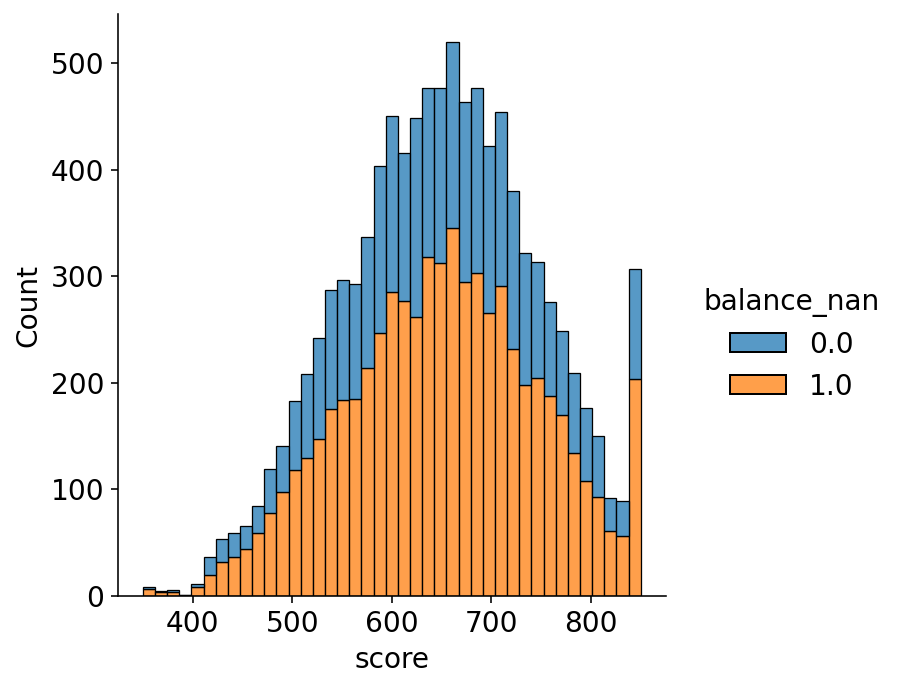

'city'

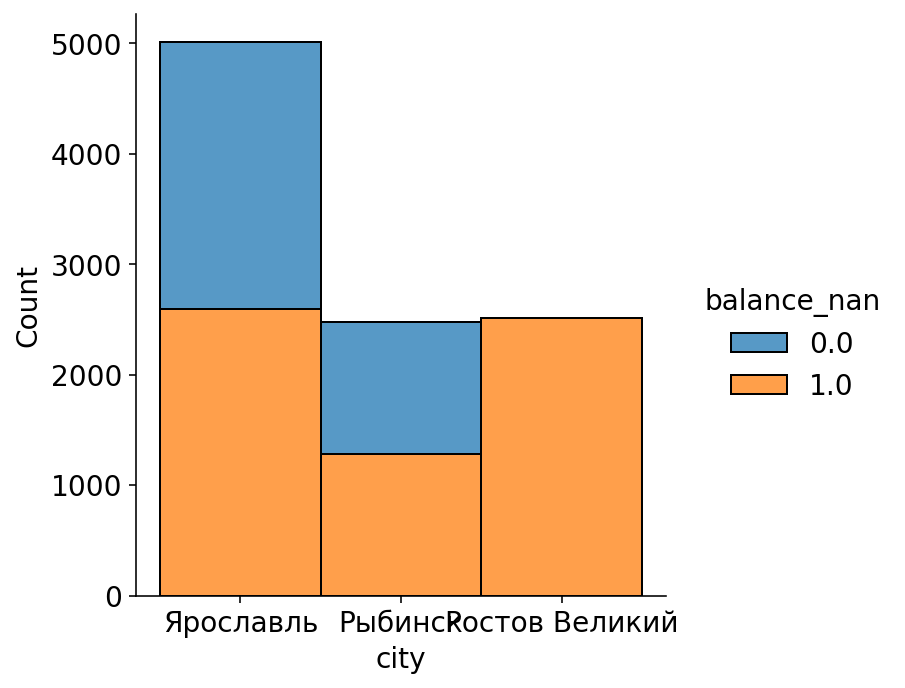

'gender'

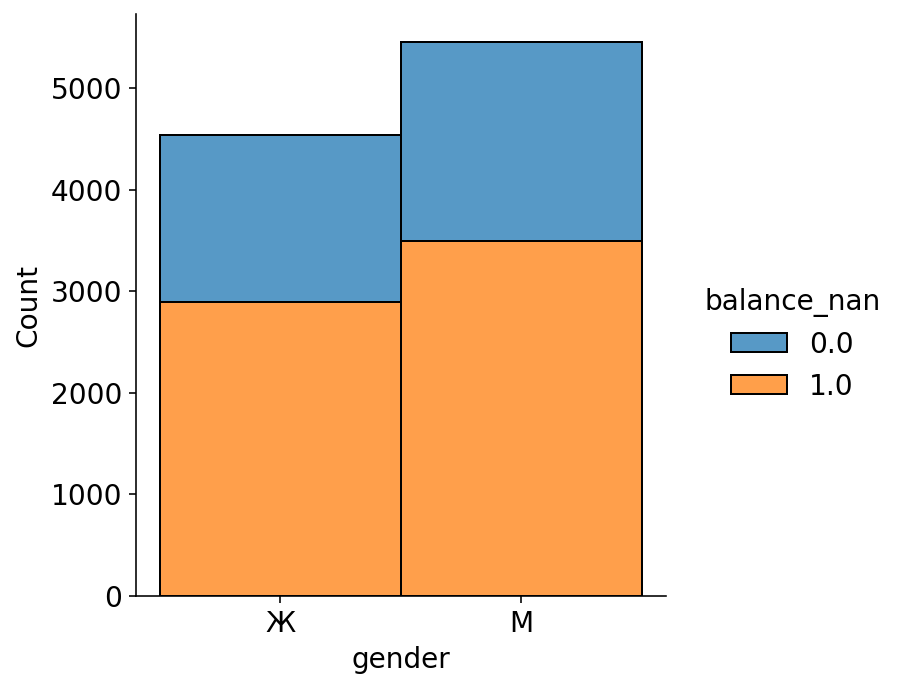

'age'

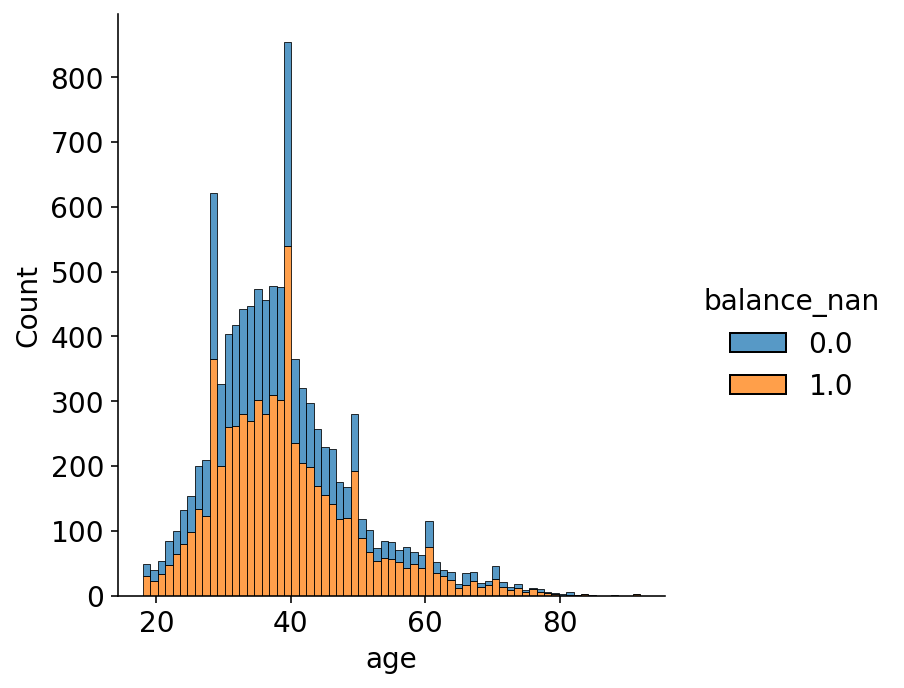

'objects'

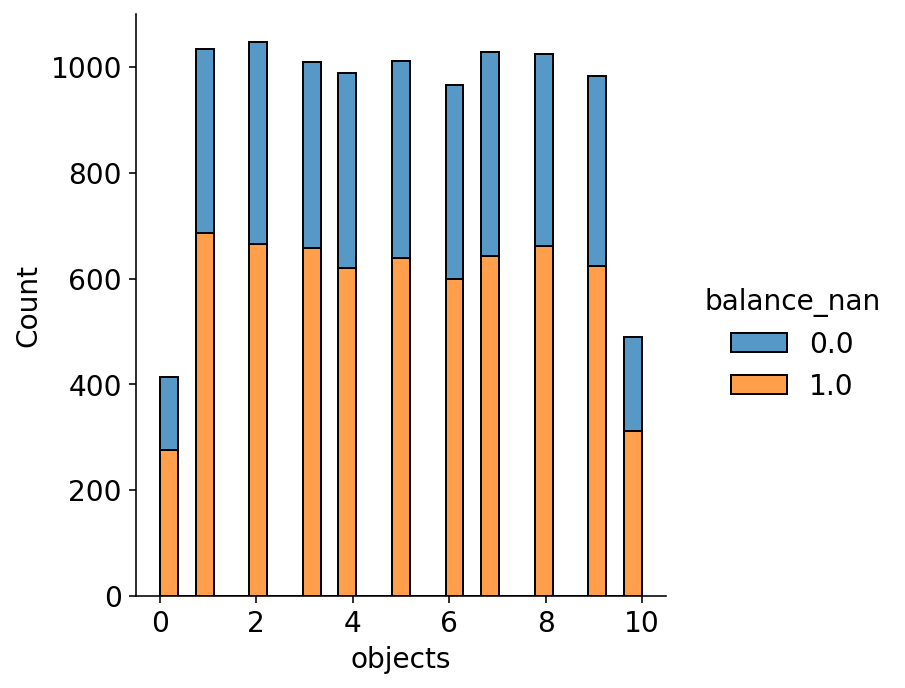

'balance'

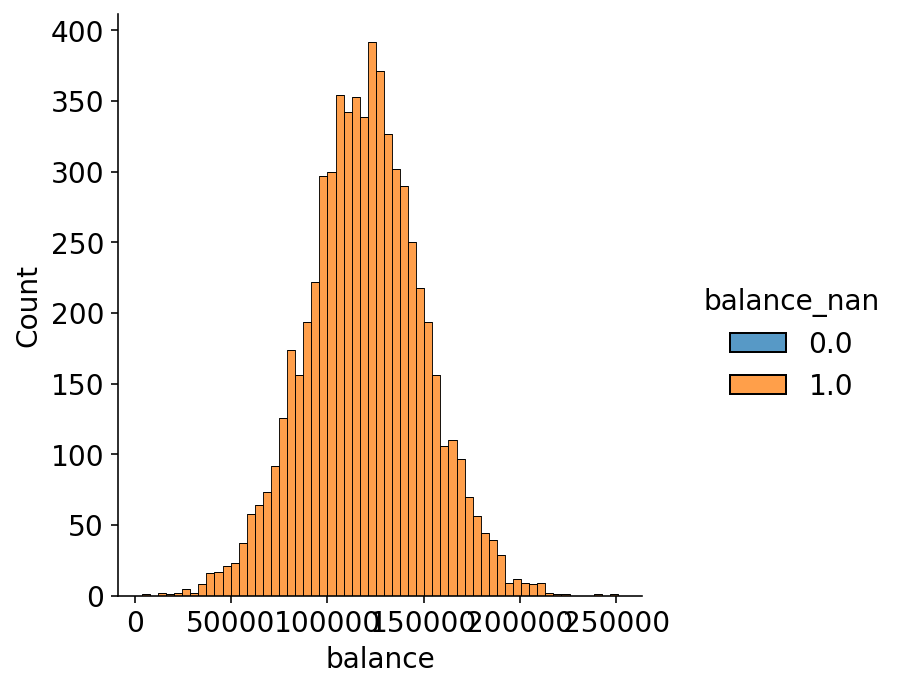

'products'

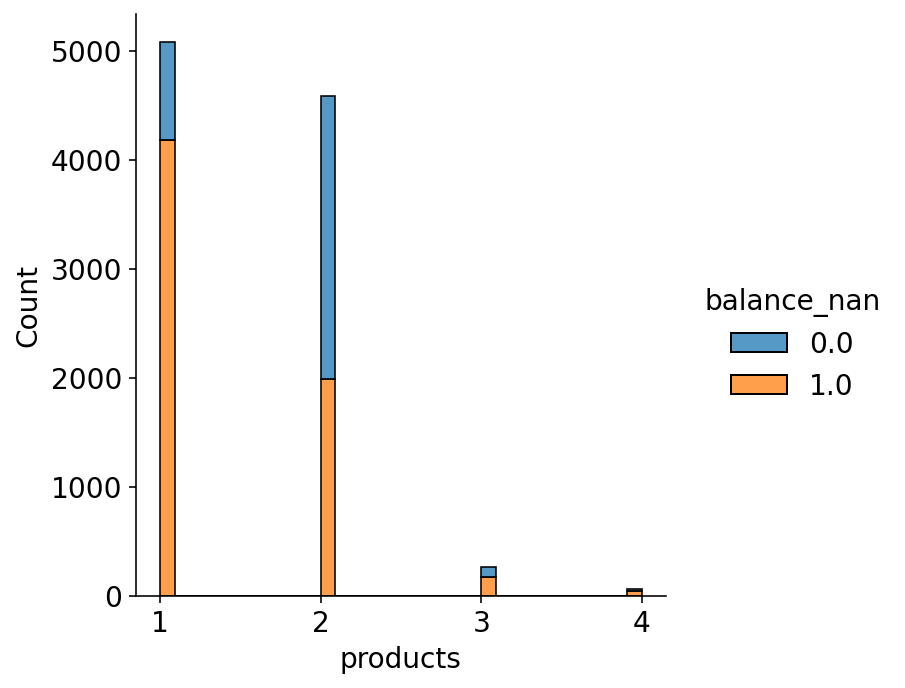

'creditcard'

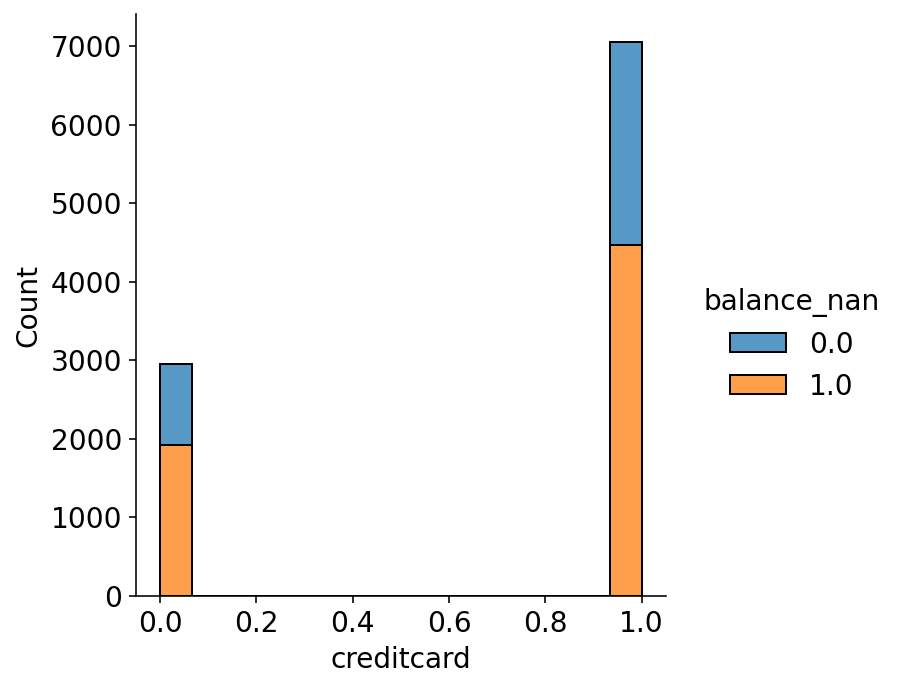

'loyalty'

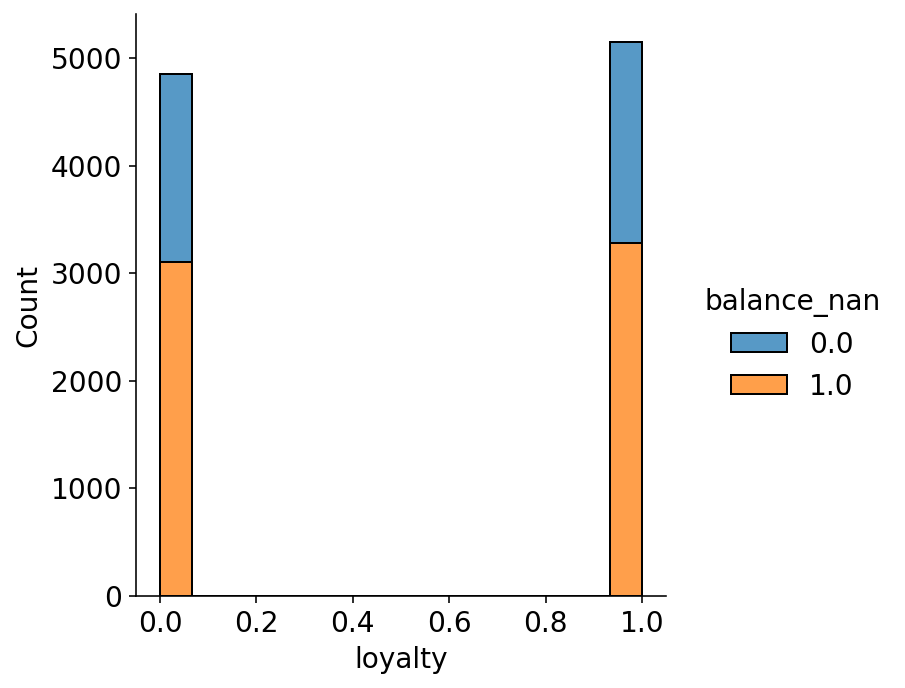

'estimated_salary'

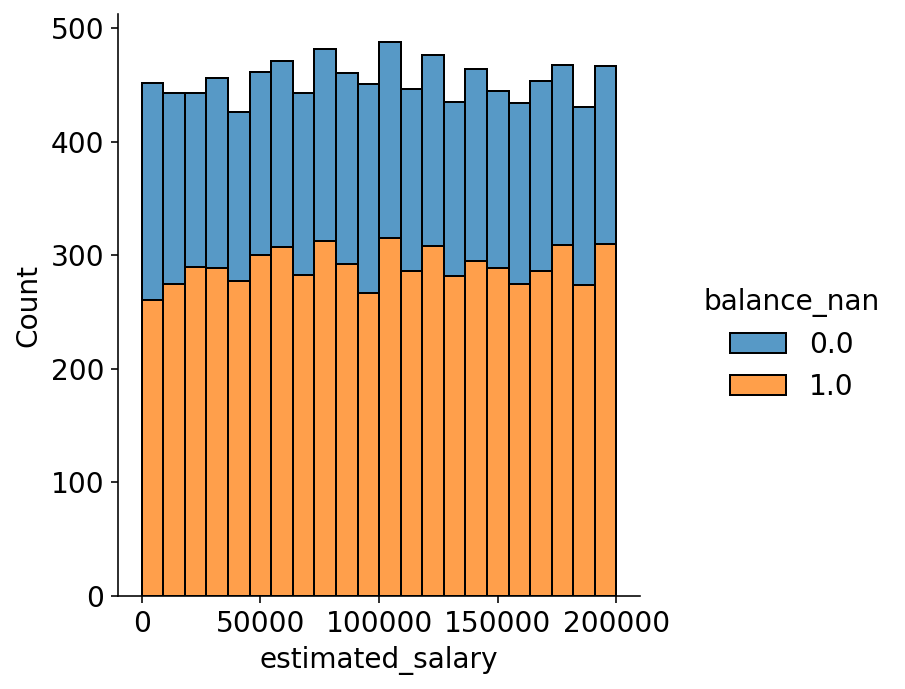

'churn'

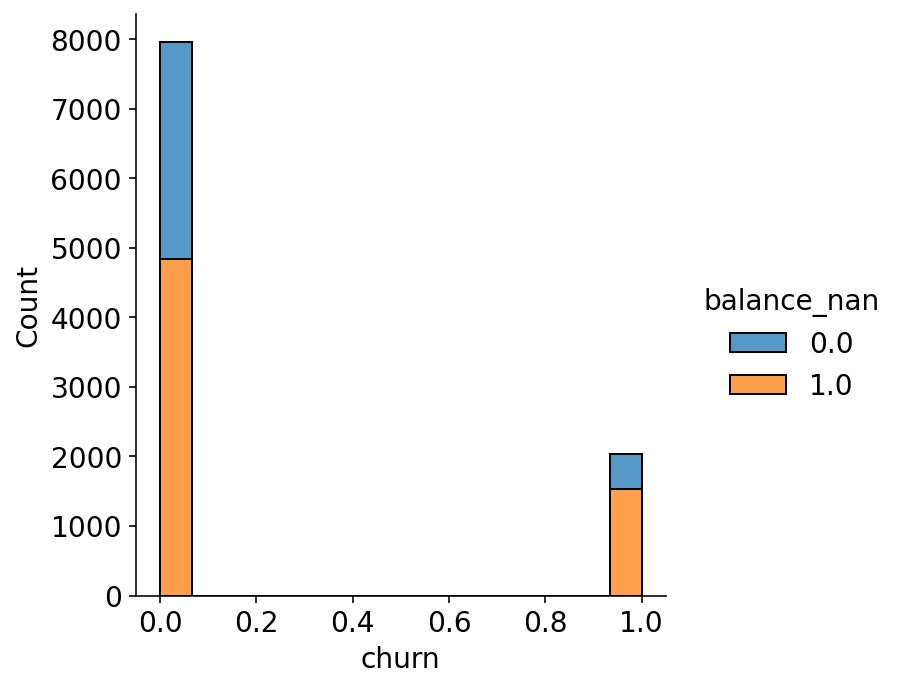

In [6]:
df['balance_nan'] = df[df['balance'].isna()].apply(lambda x: 0, axis=1)
df['balance_nan'] = df['balance_nan'].fillna(1)
for col in ['score', 'city', 'gender', 
            'age', 'objects', 'balance',
            'products', 'creditcard', 'loyalty', 
            'estimated_salary', 'churn']:
    display(col)
    
    sns.displot(df, x=col, hue="balance_nan",multiple='stack')
    plt.show()

Итак, заметила следующие общие аномалии:  
1) Высокие значения кредитного рейтинга (более 840) просуммировны     
2) Есть пики количества клиентов по возрасту каждые 10 лет, скорее всего также суммирование по группе, как и с кредитным рейтингом    
Аномалии, связанные с пропусками:  
1) Пропусков нет для города Ростов, а для остальных городов - около половины с пропусками в балансе  
2) Много пропусков для клиентов с 2 продуктами  
3) Пропусков больше для клиентов, которые остаются

In [7]:
print('Доля пропусков в колонке balance для выборки клиентов',
      df.query('city != "Ростов Великий"')['balance'].isna().sum()/len(df))

Доля пропусков в колонке balance для выборки клиентов 0.3617


Видно, что большая часть пропусков в колонке balance связана с отсутствием информации о балансе клиентов в городах Ярославль и Рыбинск. Возможно это связано с ошибкой выгрузки. Заменять значения ничем не будем, т.к. это может сильно исказить анализ.

In [8]:
df = df.drop(columns='balance_nan') # удалим лишнюю колонку

## Исследовать дубликаты, удалить;

In [9]:
df[df.duplicated()]

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn


Явных дубликатов нет, посмотрим для проверки без userid:

In [10]:
df.drop(columns='userid')[df.drop(columns='userid').duplicated()]

,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn


дубликатов нет!

## Вывод по шагу
    1) дубликатов нет  
    2) есть суммирование в переменной возраст и кредитный рейтинг  
    3) данные вполне пригодны для дальнейшего анализа

# Шаг №2. Анализ данных

Сначала добавим новые переменные, в которых отразим категории клиента возрастную и крдитного рейтинга

In [11]:
# Добавим age_group и score_group

def age_group(age):
    """
    Возвращает возрастную группу по значению возраста age, используя правила:
    - 'до 30', если age < 30 лет;
    - '30 - 39', если age от 30 до 39;
    - '40 - 49' — если age от 40 до 49;
    - '50 - 59', если age от 50 до 59;
    - '60 и старше' — если age от 60 и старше.
    """
    
    if age < 30:
        return 'до 30'
    if age <= 39:
        return 'от 30 до 39'
    if age <= 49:
        return 'от 40 до 49'
    if age <= 59:
        return 'от 50 до 59'
    return 'от 60 и старше' 

def score_group(score):
    """
    Возвращает группу кредитного рейтинга клиента по значению score, используя правила:
    - 'низкий', если score <= 500 лет;
    - 'средний', если score от 501 до 700;
    - 'высокий', если score от 701 и больше.
    """
    
    if score <= 500:
        return 'низкий'
    if score <= 700:
        return 'средний'
    return 'высокий' 

df['age_group'] = df['age'].apply(age_group)
df['score_group'] = df['score'].apply(score_group)

# Проверим как работает
df.sample(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_group,score_group
8443,15610633,619,Ростов Великий,М,23,5,"132,725.10",1,1,1,"143,913.33",0,до 30,средний
7354,15800669,733,Ростов Великий,Ж,30,1,"102,452.71",1,1,0,"21,556.95",0,от 30 до 39,высокий
3753,15620947,777,Ярославль,М,23,6,NaN,2,1,1,"163,225.48",0,до 30,высокий
773,15728056,767,Ярославль,М,36,3,"139,180.20",1,0,0,"123,880.19",0,от 30 до 39,высокий
3503,15825366,543,Ярославль,М,35,5,"137,482.19",1,0,0,"62,389.35",0,от 30 до 39,средний


Категории распределились корректно.

Посмотрим, сколько клиентов пользуются разным количеством продуктов

In [12]:
df.groupby('products',as_index=False)['userid'].agg({"Всего клиентов":'count',
                                                     "Доля от всех клиентов в %": lambda x: x.count()*100/len(df)})

,products,Всего клиентов,Доля от всех клиентов в %
0,1,5084,50.84
1,2,4590,45.90
2,3,266,2.66
3,4,60,0.60


Совсем мало клиентов с 3-мя и 4-мя продуктами - всего около 4 % на обе группы. 

## Распределение признаков в разных сегментах

Посмотрим на распределение и наличие выбросов в количественных признаках для клиентов с разным количеством продуктов

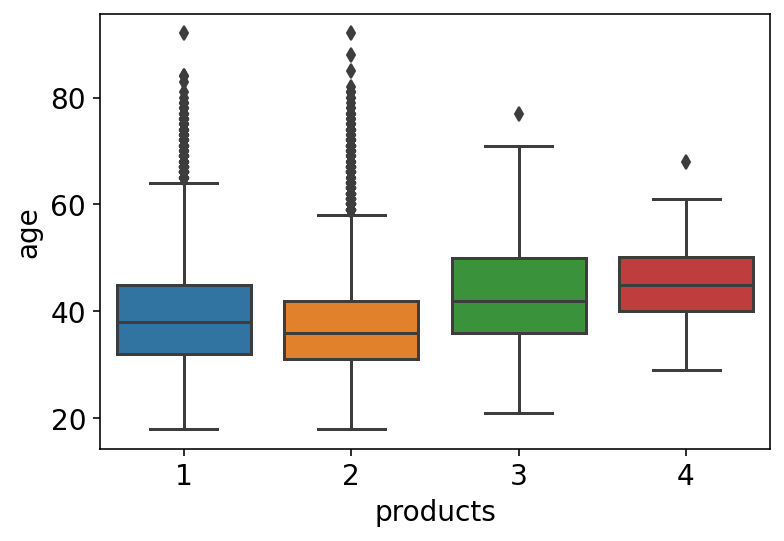

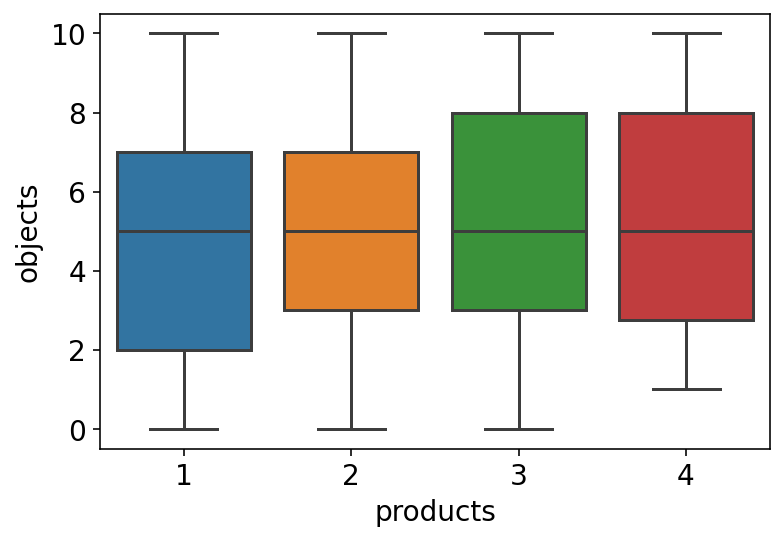

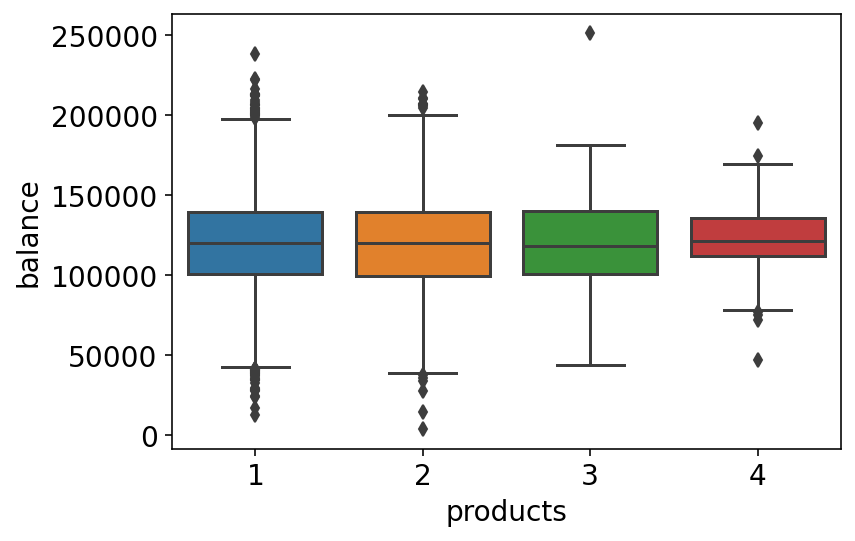

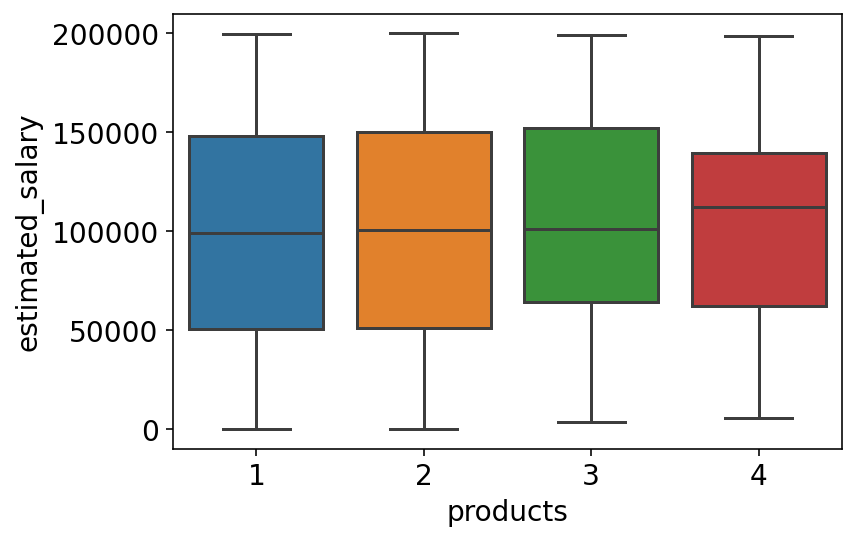

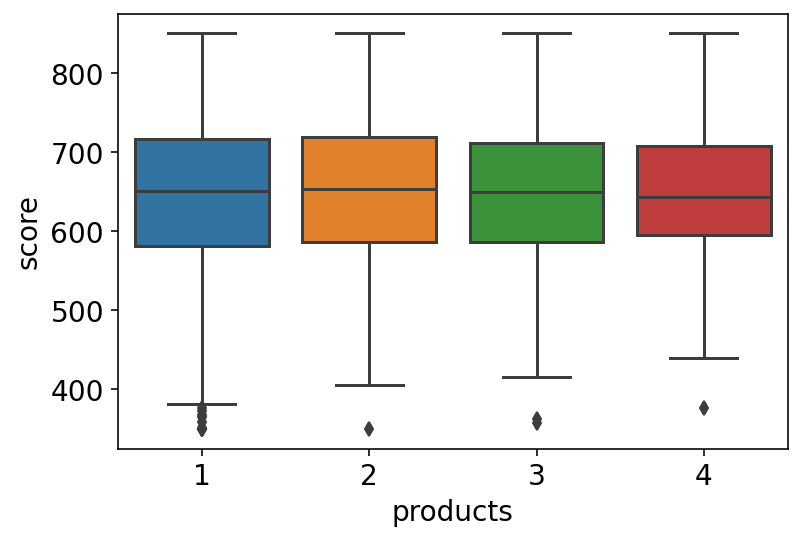

In [13]:
for col in ['age','objects','balance','estimated_salary', 'score']:
    sns.boxplot(data=df, y=col, x='products')
    plt.show()

**Возраст**  
Много выбросов вверх для клиентов с 1 и 2 продуктами. В основном для клментов с 1 продуктом характерно распределение возраста между 18 и примерно 63 годами, медианный возраст около 39 лет. Для клиентов с 2-мя продуктами - распределение - между 18 и 58 годами, медианный возраст около 38. Для 3 и 4 продуктов медианный возраст более 40 лет и распределение более нормальное, с меньшим количеством выбрасов.  
**Количество объектов в собственности**  
Медианное значение около 5, распределение для всех клиентов одинаковое. Для тех, у кого 4 продукта, характерно 1 и более объектов.  
**Баланс на счету**  
Есть выбросы в обе стороны для всех клиентов, но больше всего их для тех, у кого 1 или 2 продукта. Сренее значение у всех клиентов примерно одинаково около 120 000 рублей.  
**Зарплата**  
Медианное значение около 100 000 для клиентов с 1,2 и 3 продуктами, распределение для всех клиентов одинаковое. Для тех, у кого 4 продукта, характерно чуть более высокое значение медианной ЗП 120 000 рублей.  
**Кредитный рейтинг**  
Есть выбросы в нижнюю сторону для всех клиентов. Медианное значение и распределение примерно одинаковы.

Теперь рассмотрим распределение всех признаков, построив гистограммы для клиентов с разным количеством продуктов:

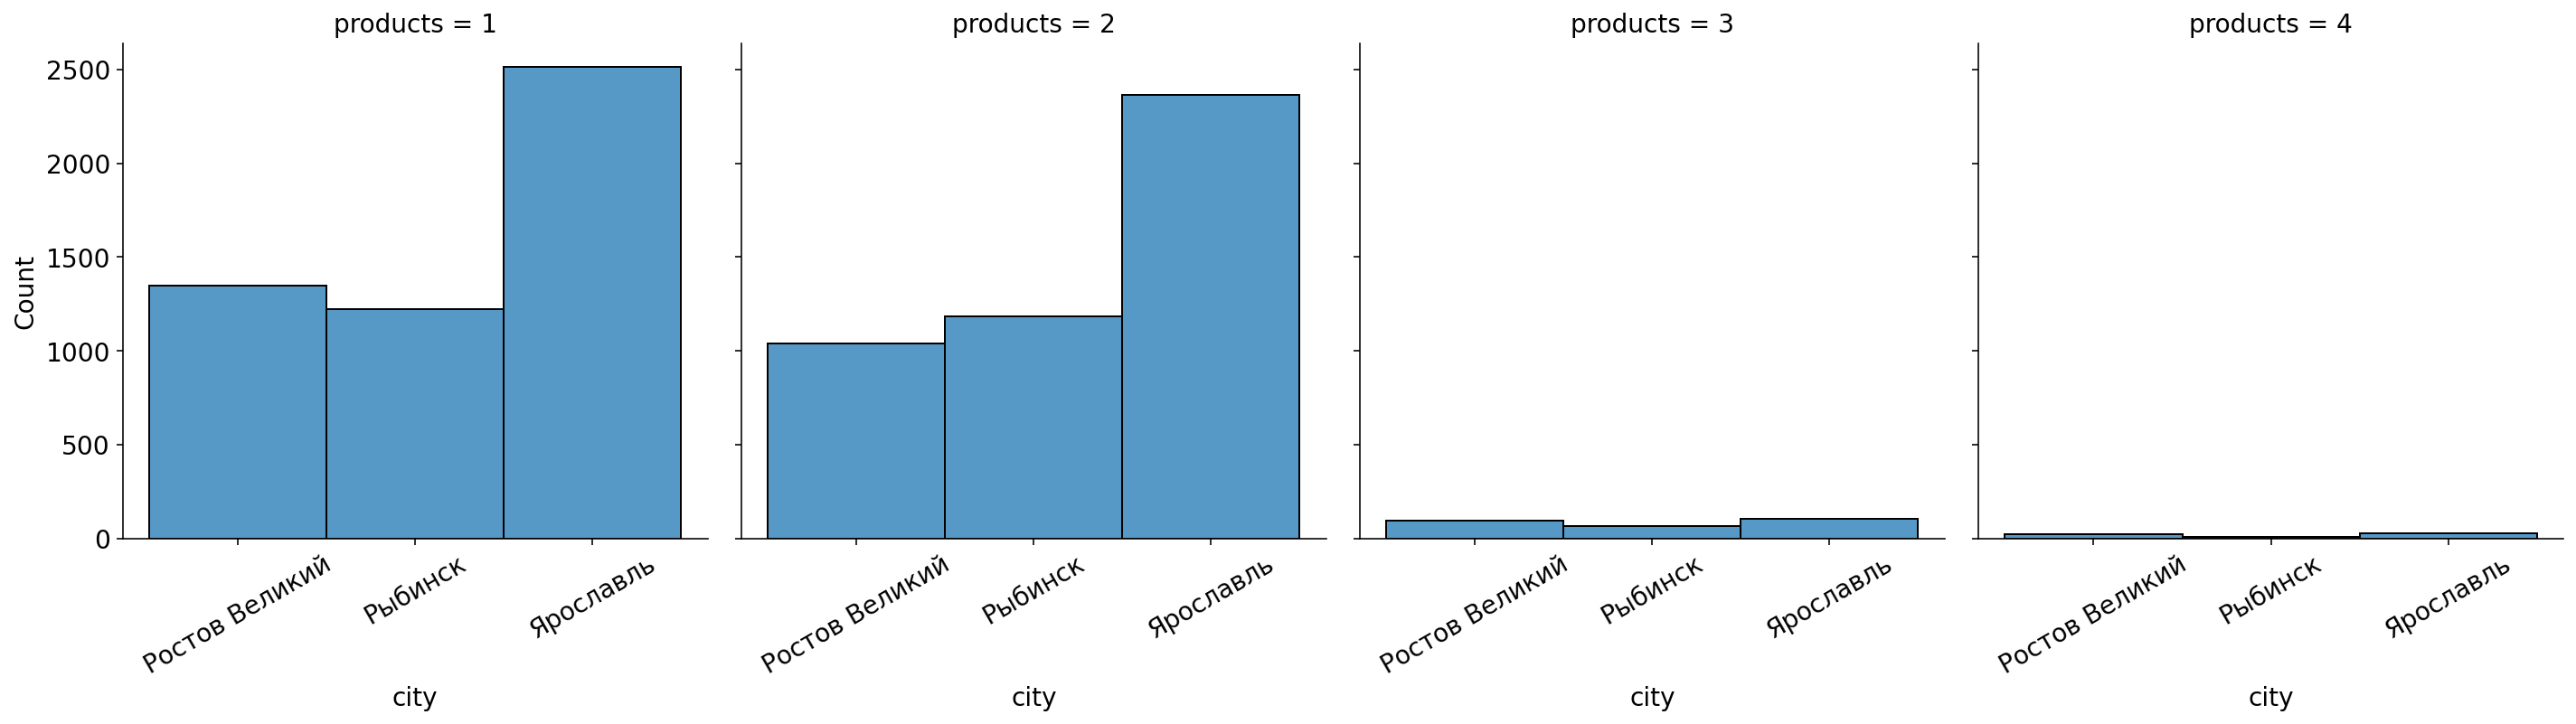

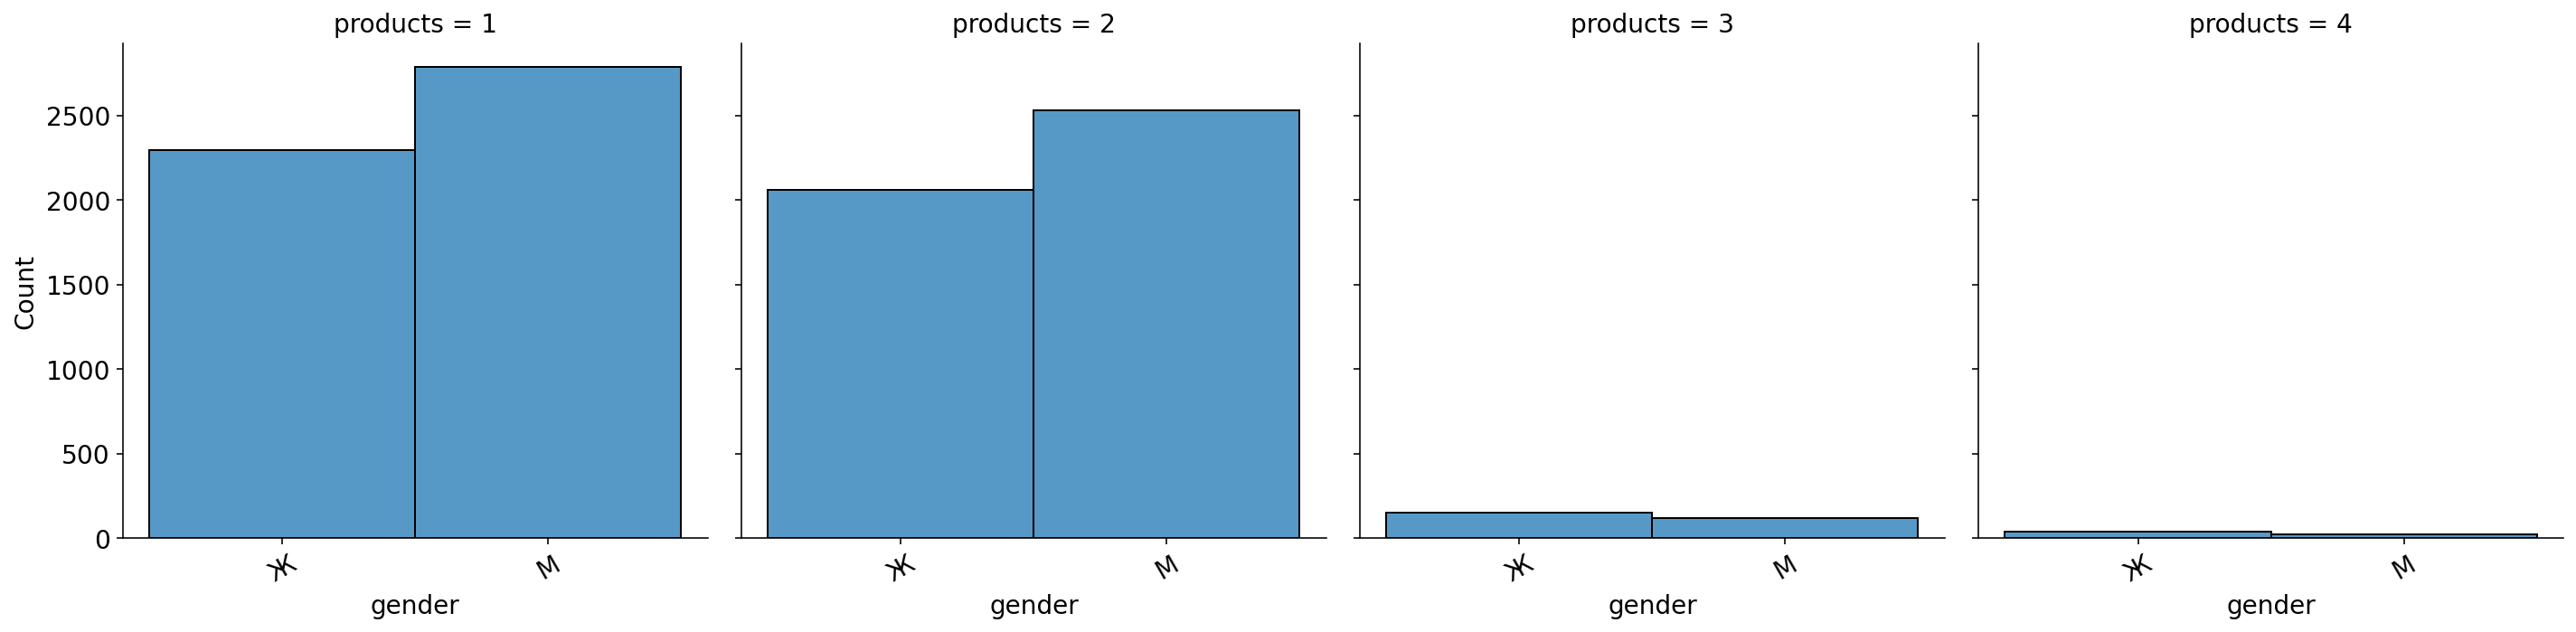

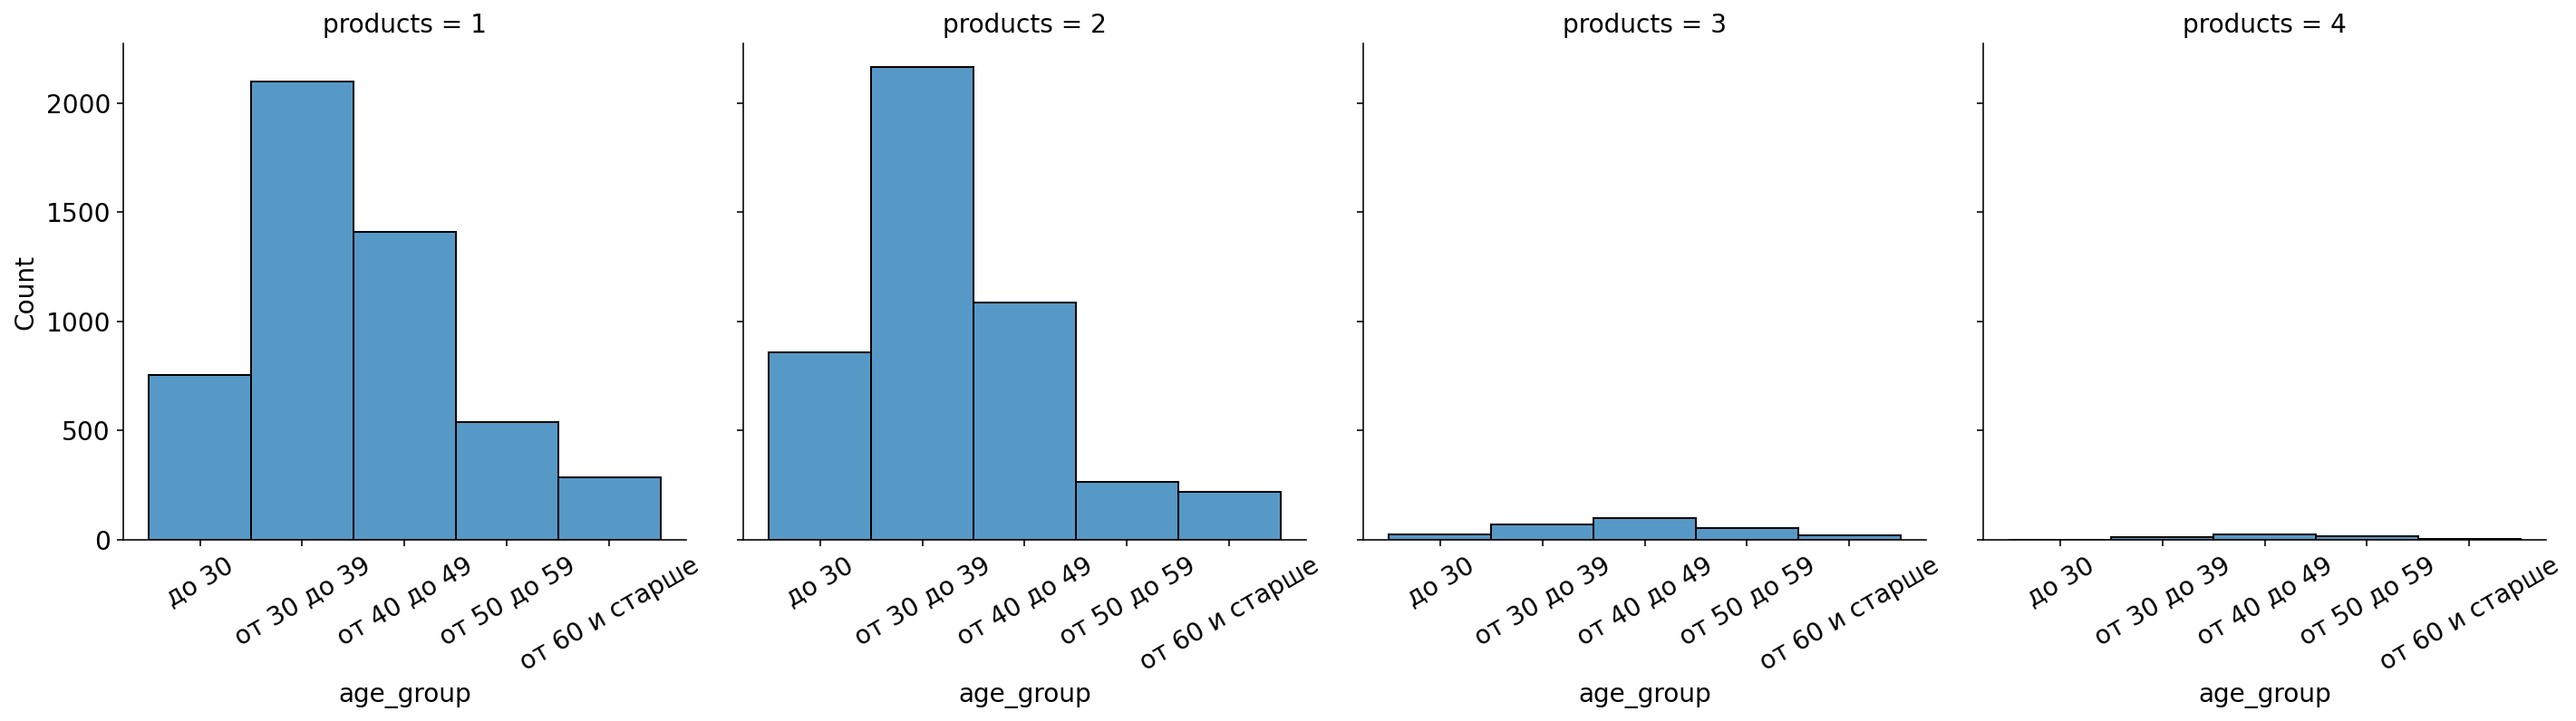

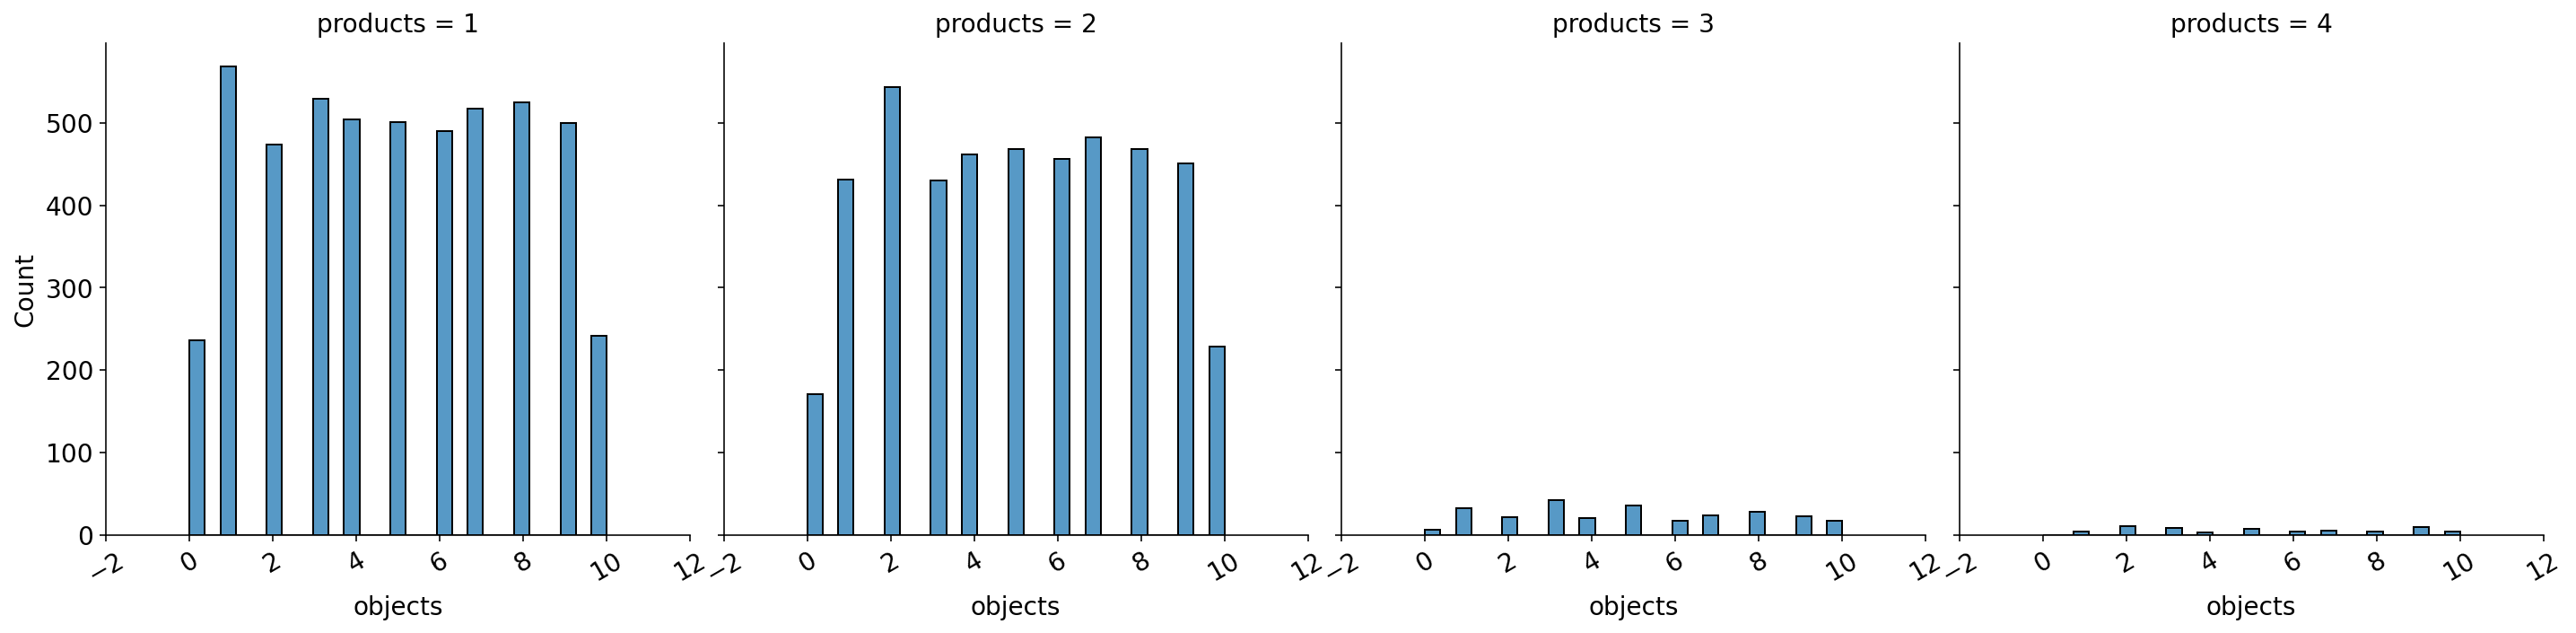

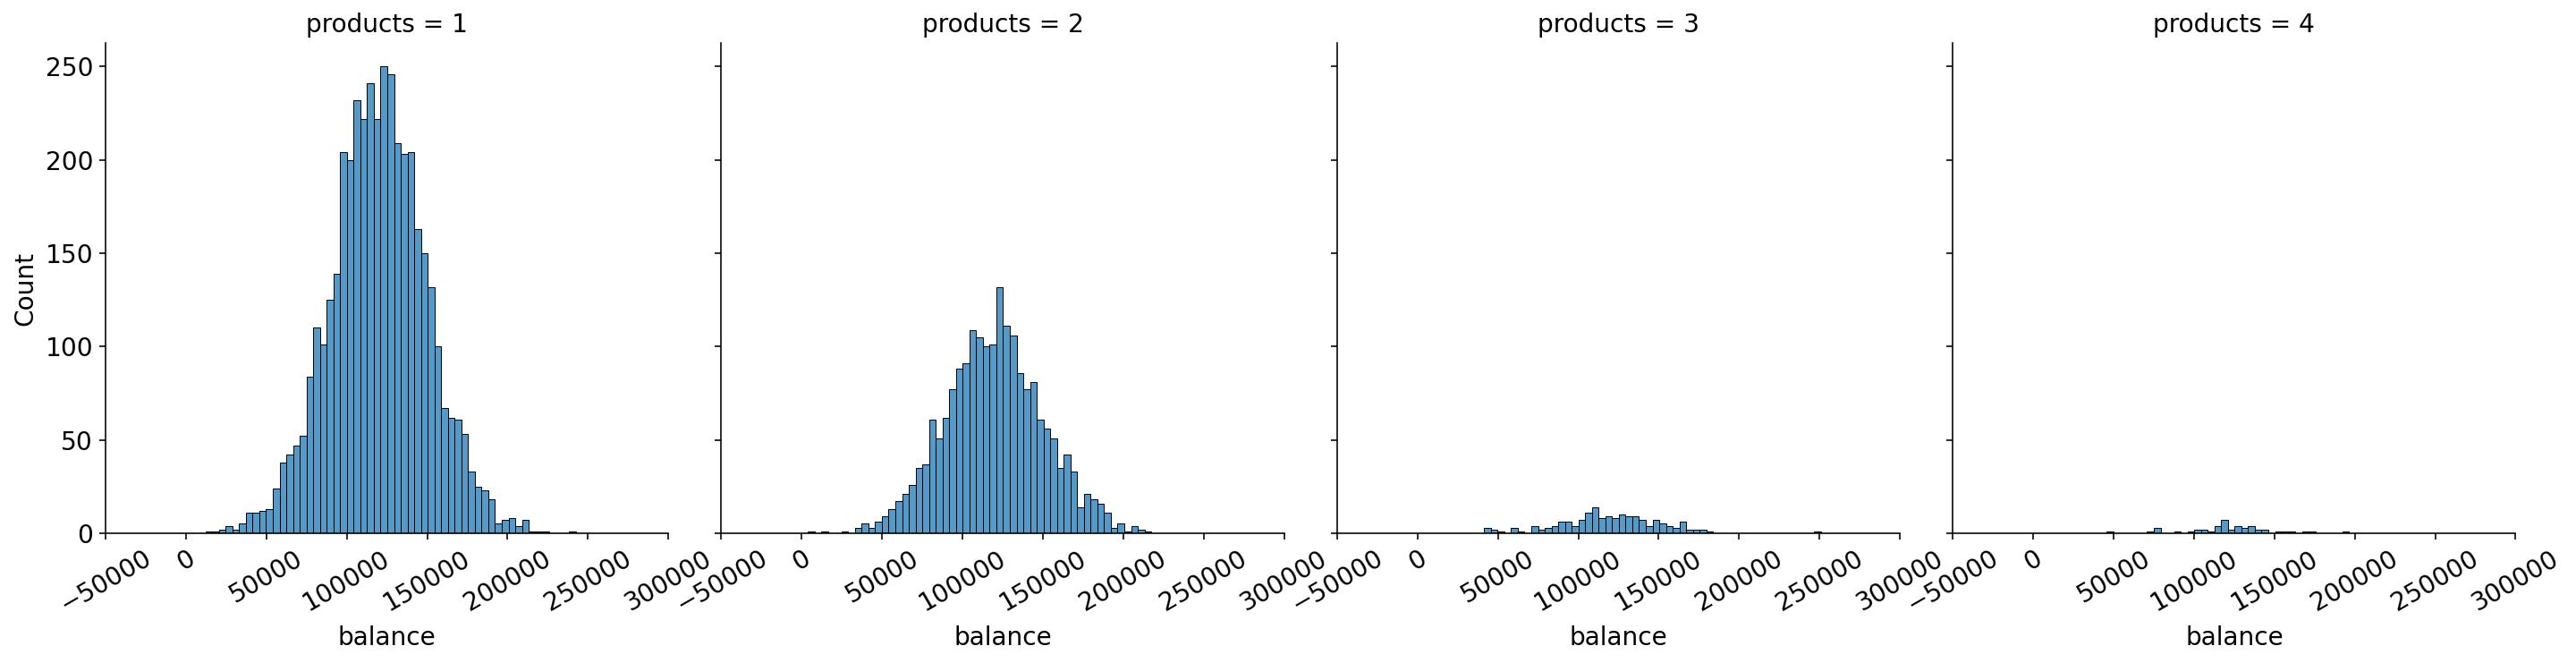

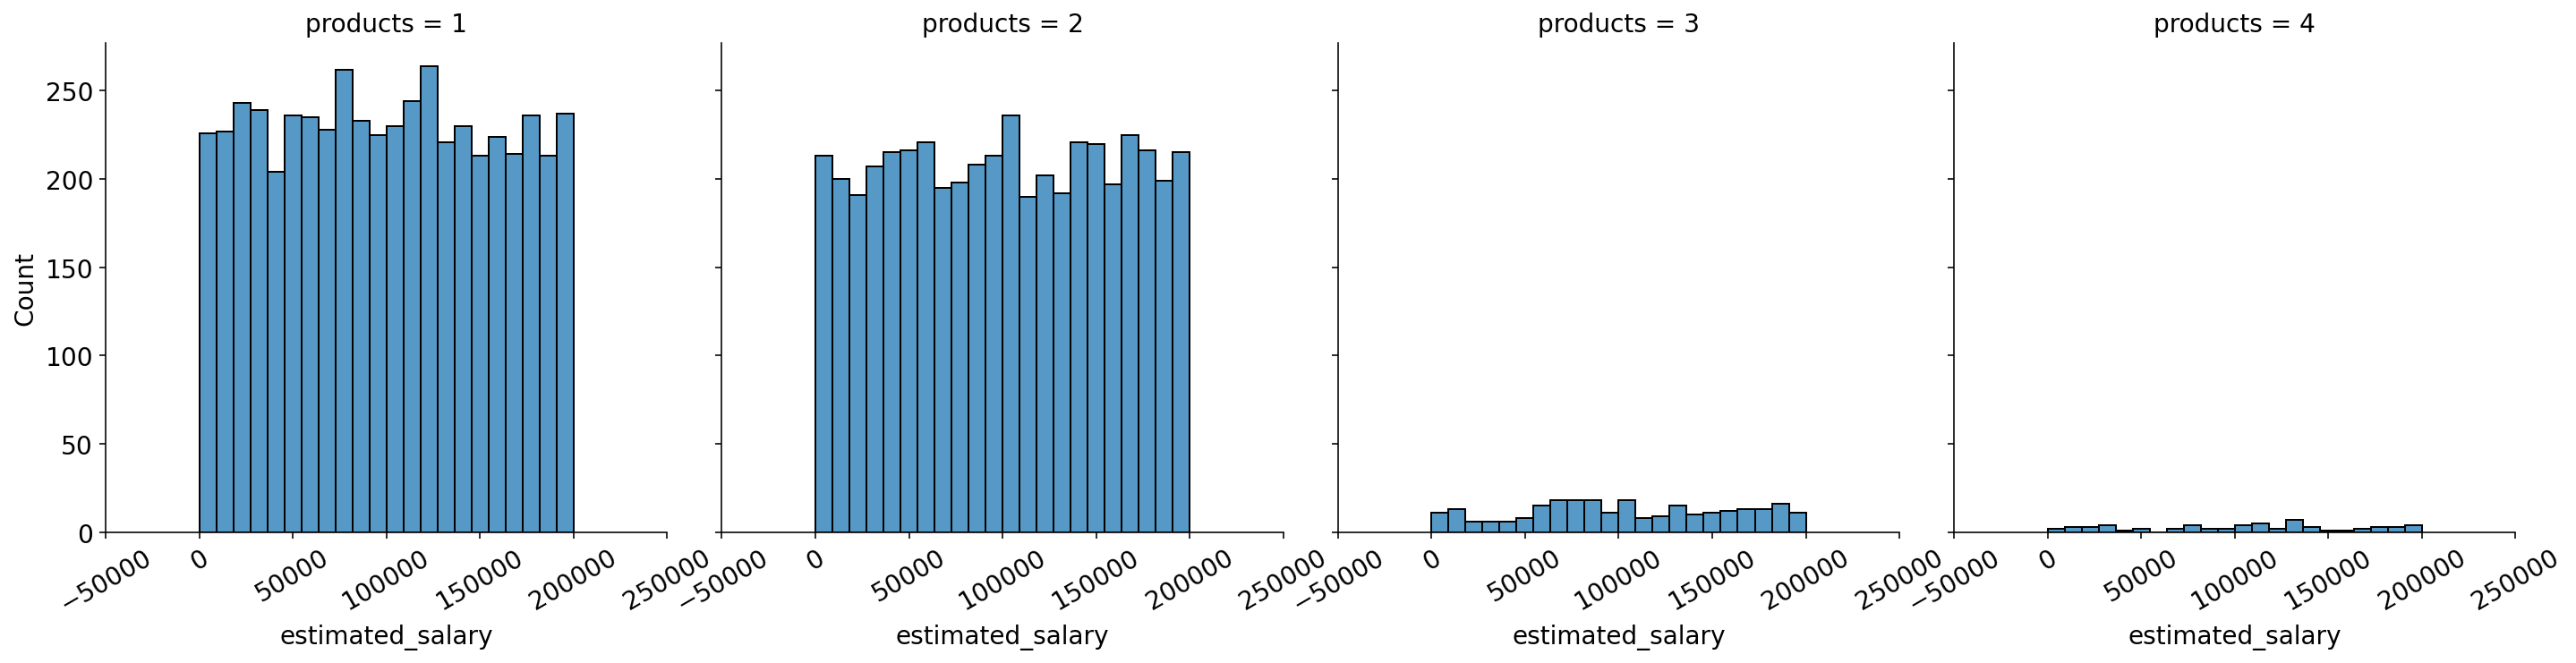

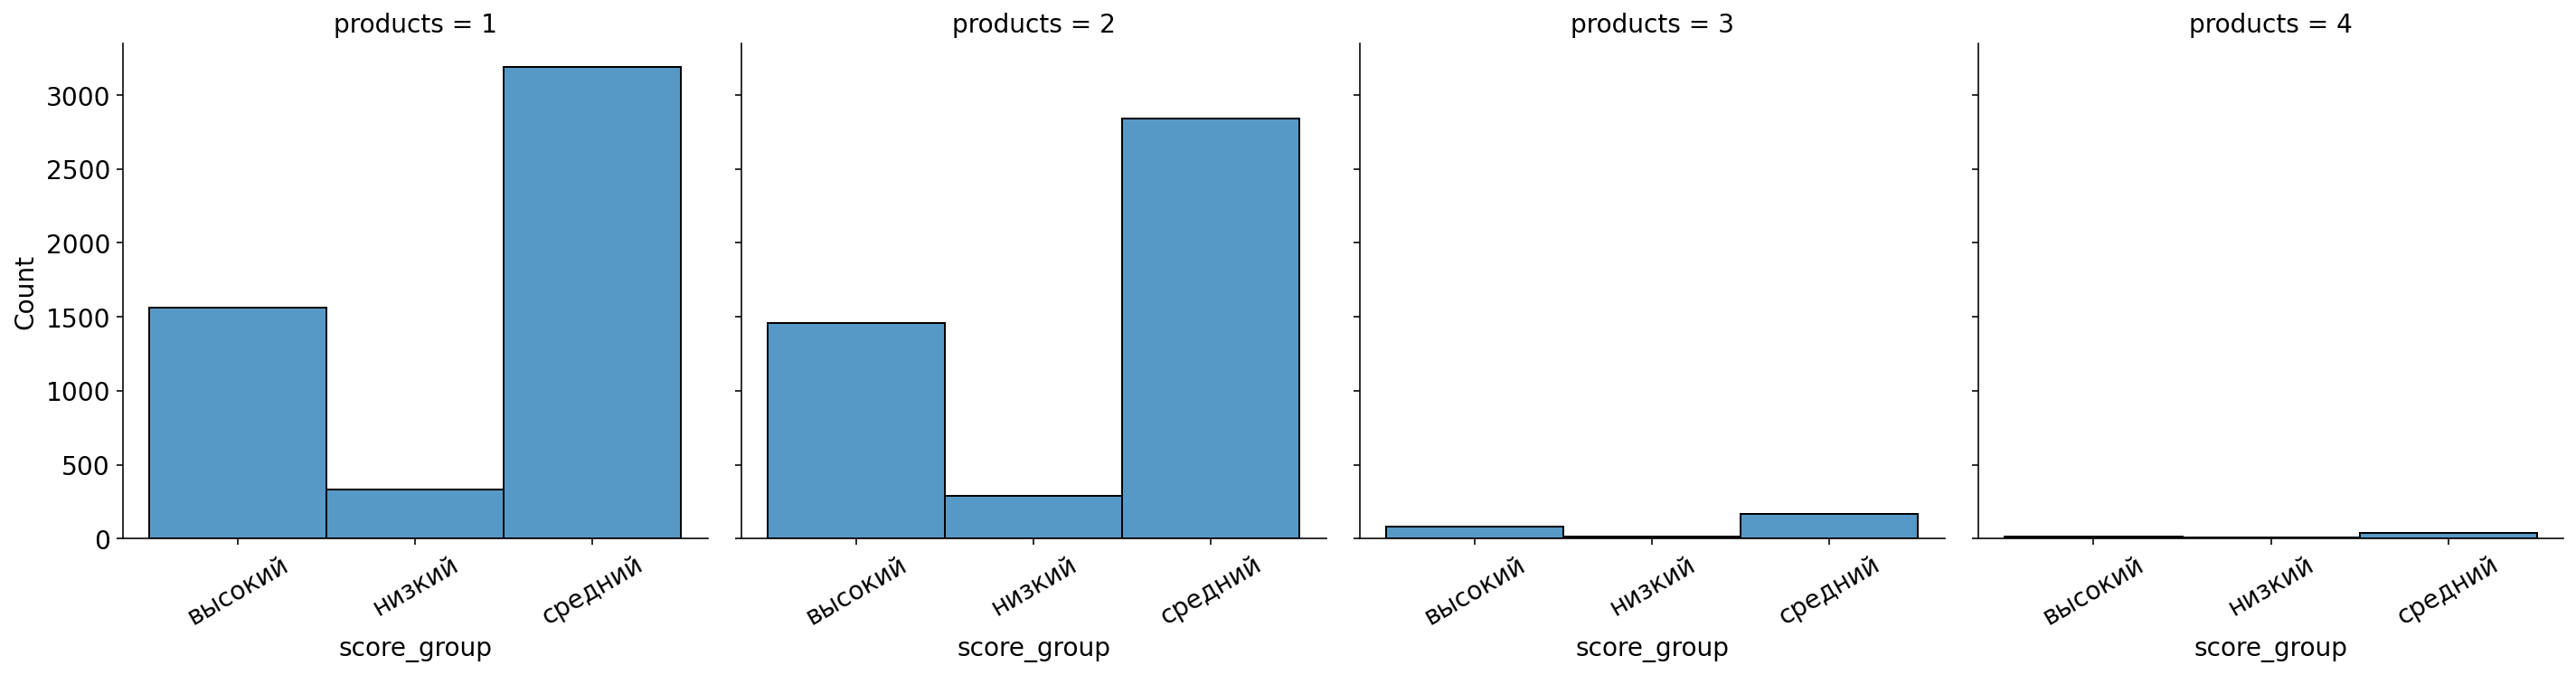

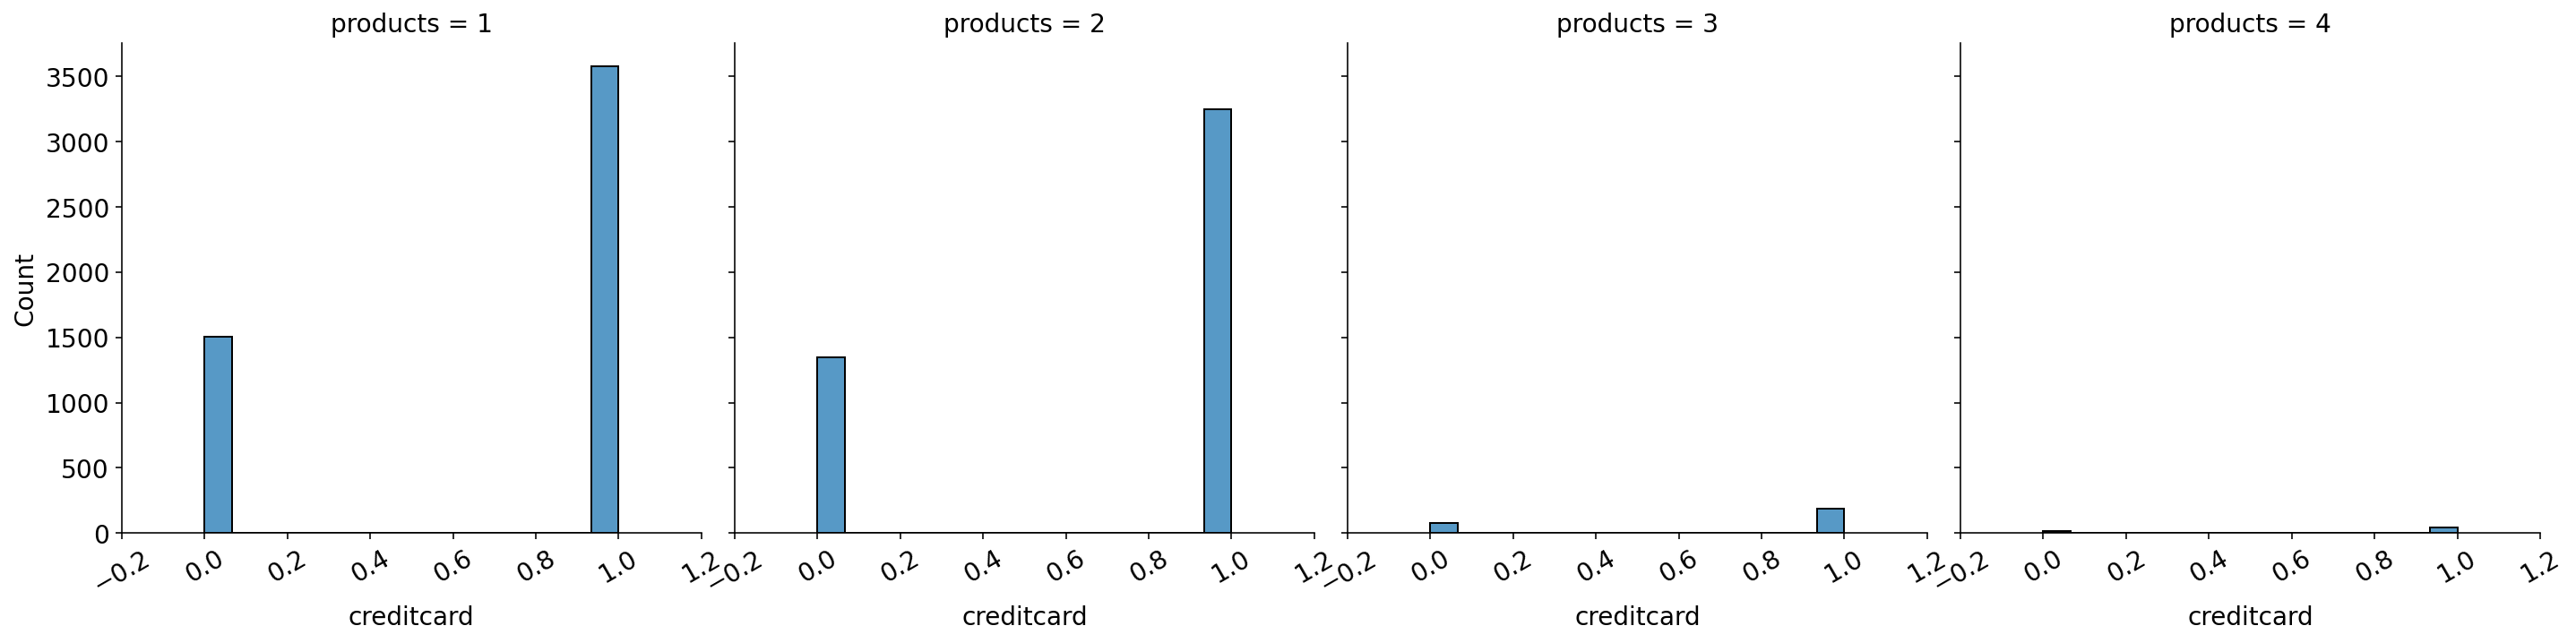

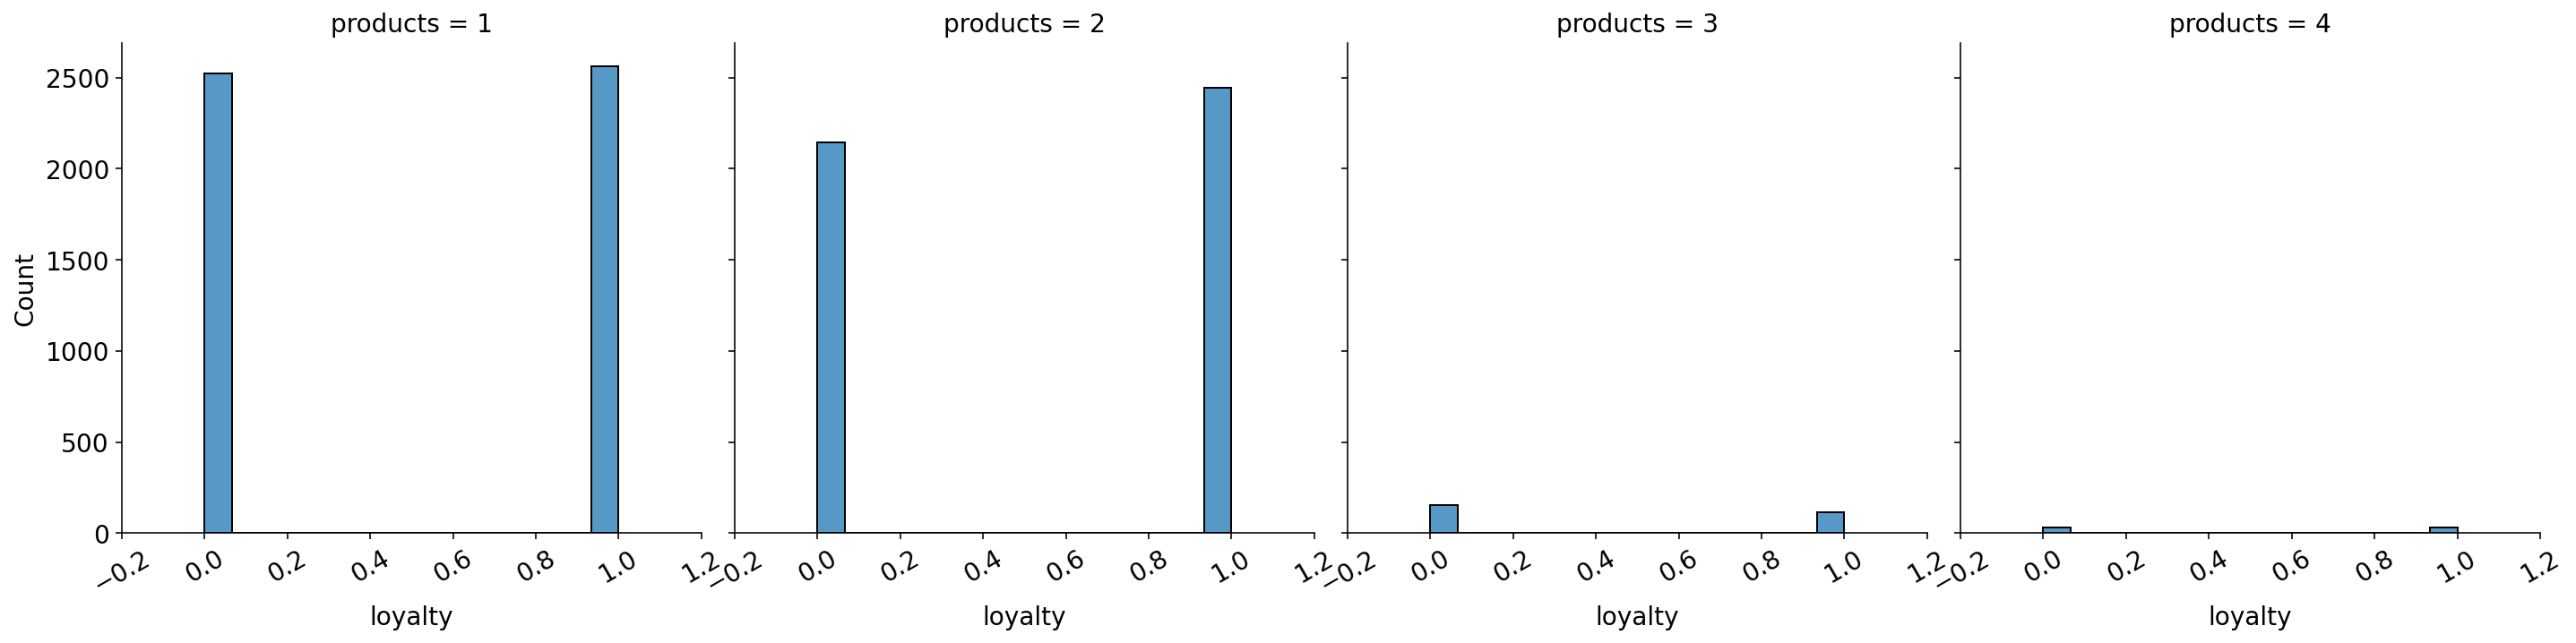

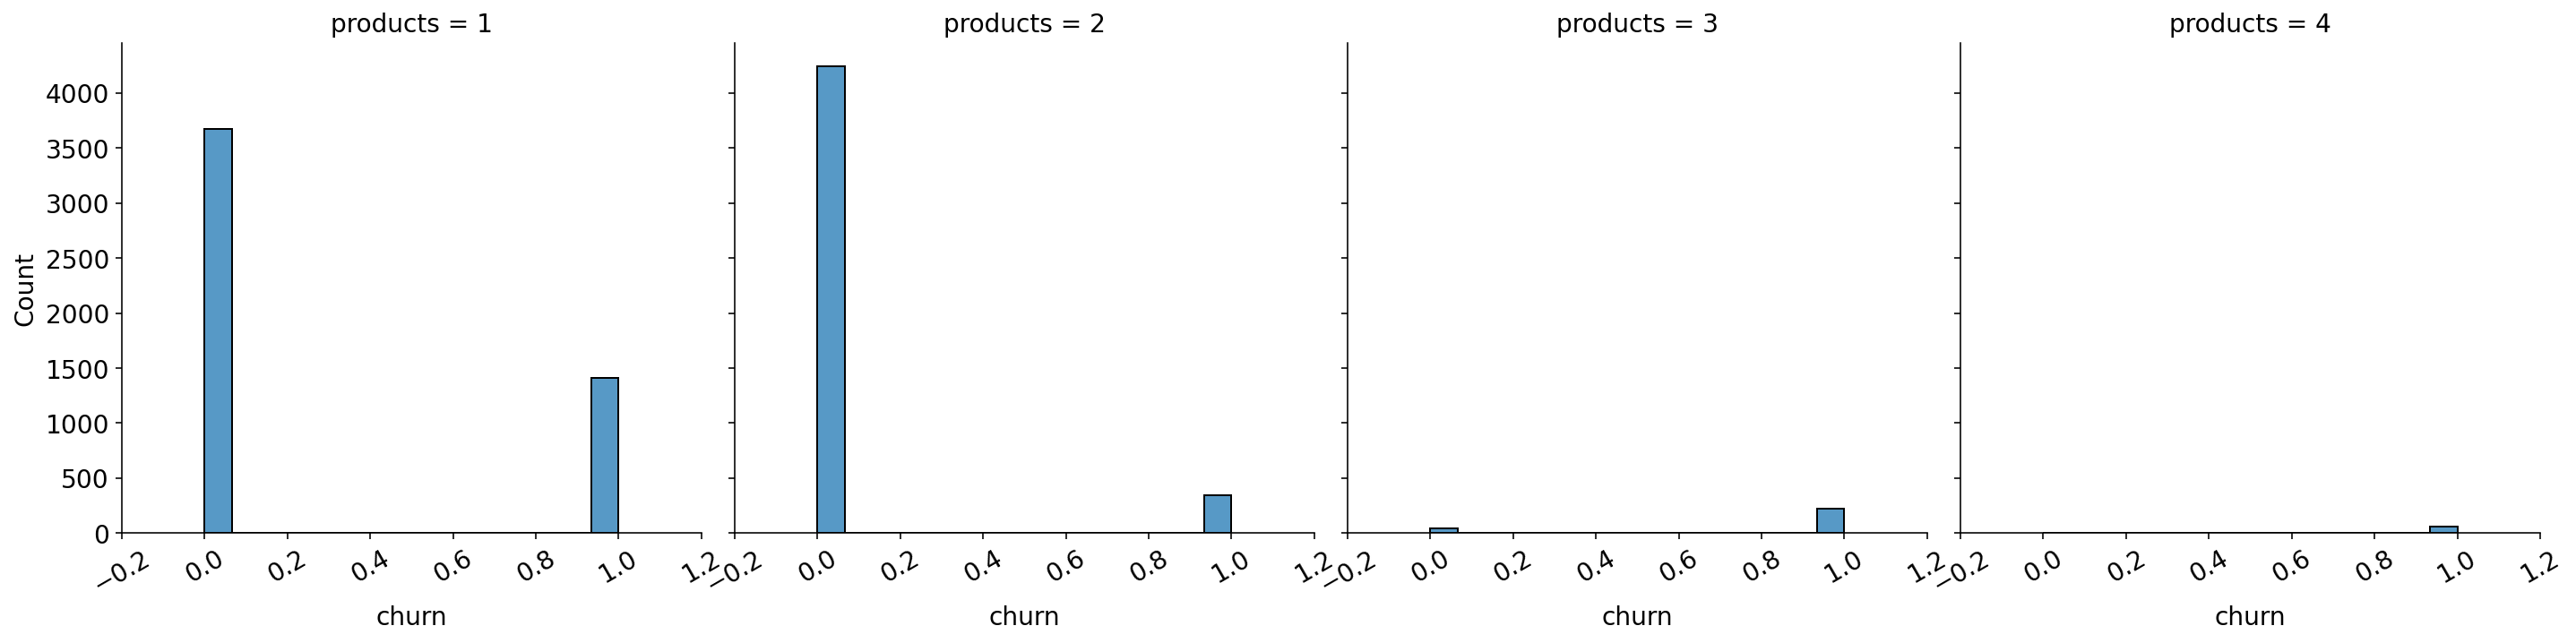

In [14]:
for col in ['city','gender','age_group',
            'objects','balance','estimated_salary',
            'score_group','creditcard','loyalty',
            'churn']:
    sns.displot(df.sort_values(by=col), x=col, col='products', multiple="dodge", shrink=1).set_xticklabels(rotation=30)

In [15]:
for col in ['city','gender','age','age_group',
            'objects','balance','estimated_salary',
            'score','score_group','creditcard','loyalty',
            'churn']:
    display(col)
    display(df.groupby('products')[col].describe())

'city'

,count,unique,top,freq
products,,,,
1,5084,3,Ярославль,2514
2,4590,3,Ярославль,2367
3,266,3,Ярославль,104
4,60,3,Ярославль,29


'gender'

,count,unique,top,freq
products,,,,
1,5084,2,М,2788
2,4590,2,М,2530
3,266,2,Ж,149
4,60,2,Ж,38


'age'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"5,084.00",39.67,10.66,18.00,32.00,38.00,45.00,92.00
2,"4,590.00",37.75,10.15,18.00,31.00,36.00,42.00,92.00
3,266.00,43.20,10.42,21.00,36.00,42.00,50.00,77.00
4,60.00,45.68,8.62,29.00,40.00,45.00,50.25,68.00


'age_group'

,count,unique,top,freq
products,,,,
1,5084,5,от 30 до 39,2098
2,4590,5,от 30 до 39,2164
3,266,5,от 40 до 49,97
4,60,5,от 40 до 49,26


'objects'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"5,084.00",4.97,2.91,0.00,2.00,5.00,7.00,10.00
2,"4,590.00",5.05,2.87,0.00,3.00,5.00,7.00,10.00
3,266.00,5.00,2.88,0.00,3.00,5.00,8.00,10.00
4,60.00,5.30,2.95,1.00,2.75,5.00,8.00,10.00


'balance'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"4,179.00","119,894.16","29,804.13","12,459.19","100,440.18","119,919.12","139,442.11","238,387.56"
2,"1,990.00","119,660.94","30,647.38","3,768.69","99,179.37","119,762.24","139,556.93","214,346.96"
3,168.00,"119,475.69","31,504.87","43,772.66","100,741.59","118,118.19","139,714.82","250,898.09"
4,46.00,"122,260.61","27,761.15","46,870.43","112,063.29","120,968.27","135,527.21","195,238.29"


'estimated_salary'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"5,084.00","99,487.26","57,363.63",11.58,"50,414.51","99,226.83","148,212.70","199,970.74"
2,"4,590.00","100,452.01","57,790.80",90.07,"50,797.29","100,738.85","150,151.46","199,992.48"
3,266.00,"104,318.13","55,464.28","3,440.47","64,344.80","101,046.89","152,230.20","199,357.24"
4,60.00,"104,763.72","57,526.49","5,669.31","62,033.39","112,163.11","139,371.95","198,874.52"


'score'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"5,084.00",649.12,97.20,350.00,581.00,651.00,717.00,850.00
2,"4,590.00",652.19,96.07,350.00,586.00,653.00,719.00,850.00
3,266.00,648.11,95.19,358.00,586.00,650.00,711.00,850.00
4,60.00,653.58,101.27,376.00,595.00,643.00,708.00,850.00


'score_group'

,count,unique,top,freq
products,,,,
1,5084,3,средний,3190
2,4590,3,средний,2842
3,266,3,средний,170
4,60,3,средний,39


'creditcard'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"5,084.00",0.70,0.46,0.00,0.00,1.00,1.00,1.00
2,"4,590.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
3,266.00,0.71,0.45,0.00,0.00,1.00,1.00,1.00
4,60.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00


'loyalty'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"5,084.00",0.50,0.50,0.00,0.00,1.00,1.00,1.00
2,"4,590.00",0.53,0.50,0.00,0.00,1.00,1.00,1.00
3,266.00,0.42,0.50,0.00,0.00,0.00,1.00,1.00
4,60.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00


'churn'

,count,mean,std,min,25%,50%,75%,max
products,,,,,,,,
1,"5,084.00",0.28,0.45,0.00,0.00,0.00,1.00,1.00
2,"4,590.00",0.08,0.26,0.00,0.00,0.00,0.00,1.00
3,266.00,0.83,0.38,0.00,1.00,1.00,1.00,1.00
4,60.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


Распределение у клиентов с разным количеством продуктов отличается в следующих признаках:   
  
**город**  
клиентов из Ростова и Ярославля немного больше с 1-им продуктом, чем с 2-мя, с 3-мя и 4-мя продуктами распределение между городами примерно одинаковое, но отличное от клиентов с 1-2 продуктами  
**пол**  
женщины-клиентки незначительно преобладают с 3-мя и 4-мя продуктами, мужчин - наоборот, больше с 1-2 продуктами  
**возраст**  
распределение клиентов по возрастным граппам различное для тех, кто с 1-2 продуктами и кто с 3-4: в первом случае - оно скошенно влево и есть выбросы в сторону старших возрастов, во втором случае - похоже на нормальное  
**лояльность**  
различия в лояльности небольшие для каждой из групп, однако наиболее лояльны - клиенты с 2-мя и 1-м продуктом, в то время как с 3-мя продуктами наблюдается самая низкая лояльность.  
**отток**  
все группы показали существенные различия в оттоке. Самый высокий отток у клиентов с 4-мя продуктами - они ушли все! С 3-мя продуктами тоже много уходит (в среднем 83 из 100). Клиенты с 2-мя - уходят очень редко (8 из 100), а с 1-м продуктом уходит 28 из 100 клиентов.  
  
Остальные признаки не показали каких-либо существенных различий между группами по распределению данных.

### Вывод по разделу
    Итак, по итогам анализа, можно сделать следующие выводы:  
    1) целевой клиент для банка - это клиент с 2 продуктами - у них наименьший отток и наибольшая лояльность  
    2) основные признаки ('objects','balance','estimated_salary','score','score_group','creditcard') не показали различий в распределении значений, что пока выглядит странно

## Сопоставим статистику признаков с оттоком клиентов

Найдём процент оттока в каждом признаке и для каждой группы клиентов

In [16]:
for col in ['score_group','city','gender',
            'age_group','objects','creditcard','loyalty']:
    display(pd.pivot_table(df, index='products',
                           columns=[col],
                           values='churn', aggfunc='mean'))

score_group,высокий,низкий,средний
products,,,
1,0.28,0.30,0.27
2,0.07,0.11,0.07
3,0.80,0.93,0.83
4,1.00,1.00,1.00


city,Ростов Великий,Рыбинск,Ярославль
products,,,
1,0.43,0.22,0.22
2,0.12,0.07,0.06
3,0.90,0.79,0.79
4,1.00,1.00,1.00


gender,Ж,М
products,,
1,0.33,0.23
2,0.10,0.05
3,0.87,0.78
4,1.00,1.00


age_group,до 30,от 30 до 39,от 40 до 49,от 50 до 59,от 60 и старше
products,,,,,
1,0.11,0.15,0.40,0.64,0.35
2,0.03,0.04,0.12,0.29,0.13
3,0.62,0.71,0.90,0.98,0.79
4,1.00,1.00,1.00,1.00,1.00


objects,0,1,2,3,4,5,6,7,8,9,10
products,,,,,,,,,,,
1,0.28,0.30,0.30,0.26,0.29,0.29,0.28,0.23,0.25,0.31,0.26
2,0.13,0.08,0.06,0.08,0.09,0.06,0.08,0.07,0.08,0.07,0.08
3,1.00,0.78,0.81,0.86,0.65,0.86,0.94,0.79,0.86,0.74,0.94
4,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


creditcard,0,1
products,,
1,0.28,0.28
2,0.08,0.07
3,0.84,0.82
4,1.00,1.00


loyalty,0,1
products,,
1,0.37,0.19
2,0.10,0.06
3,0.88,0.75
4,1.00,1.00


Посмотрим теперь на те же распределения признаков, но добавим различие по оттоку:

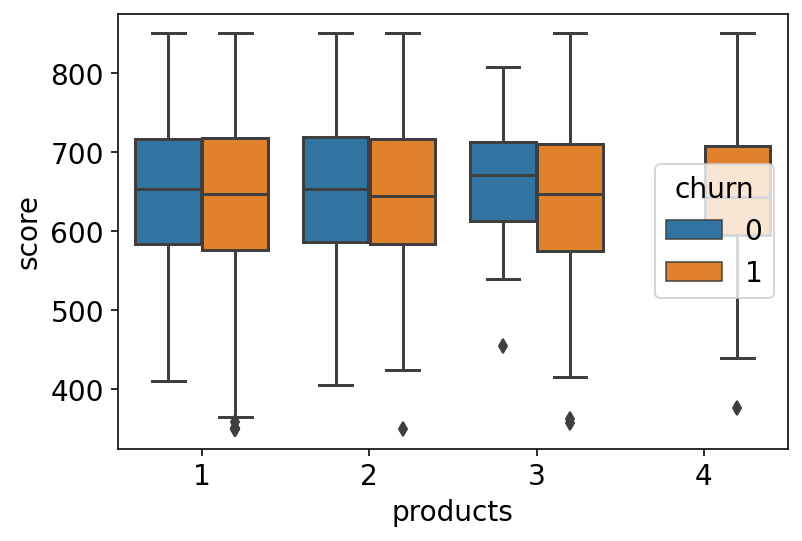

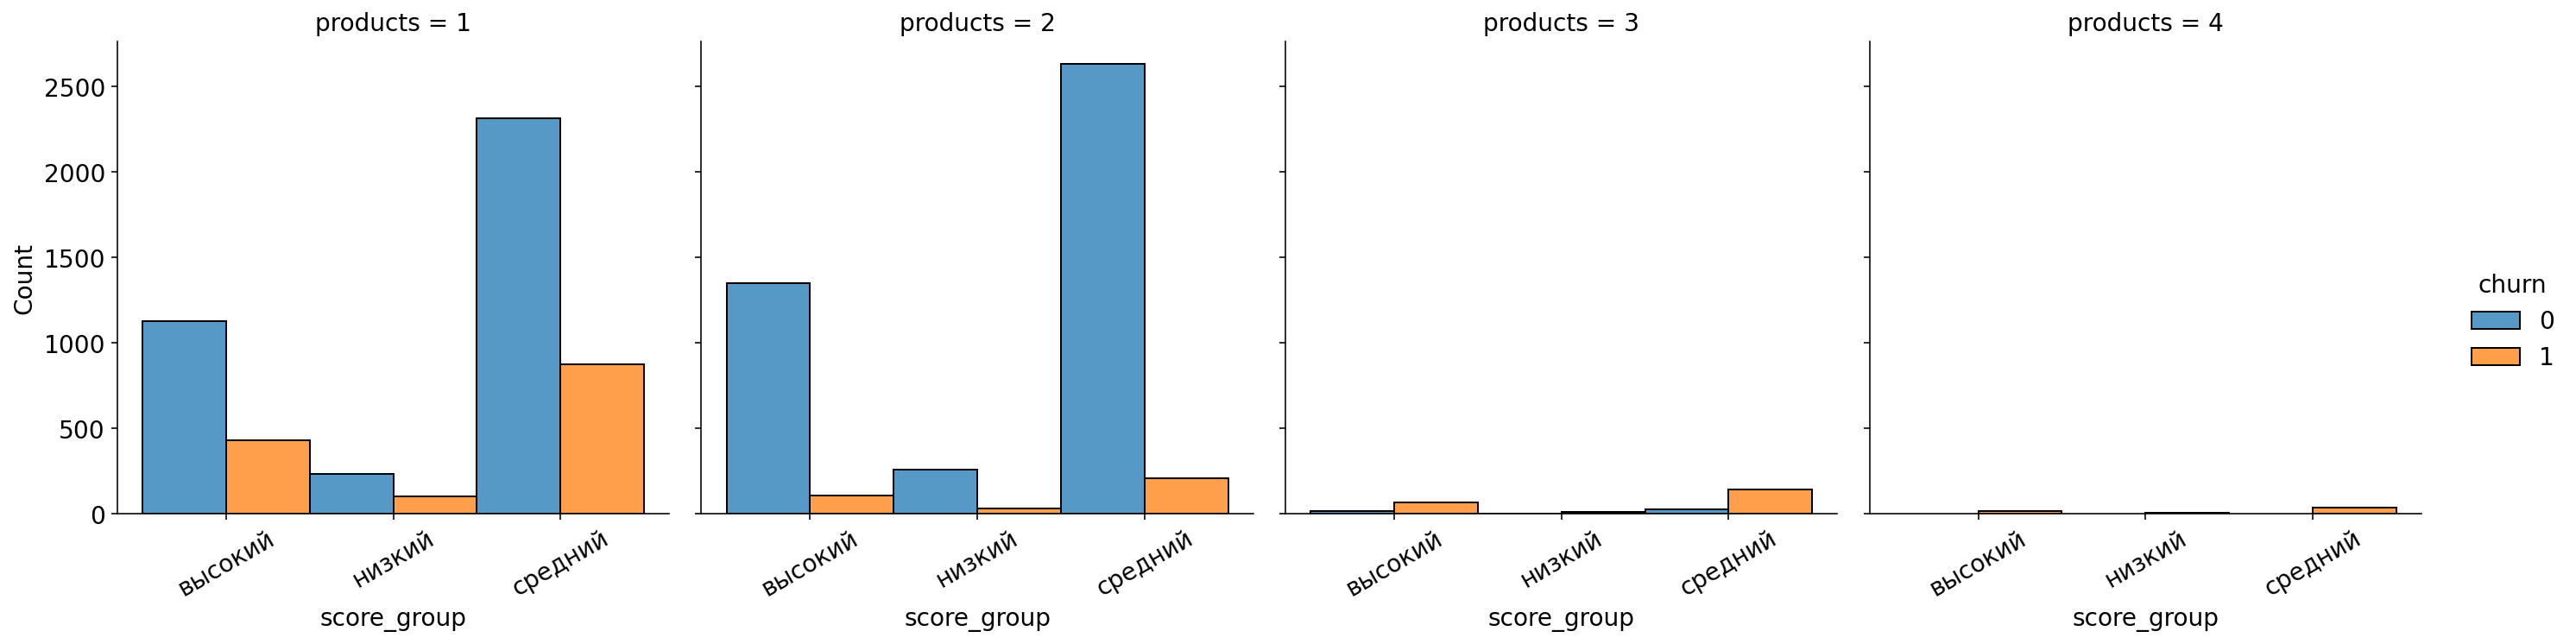

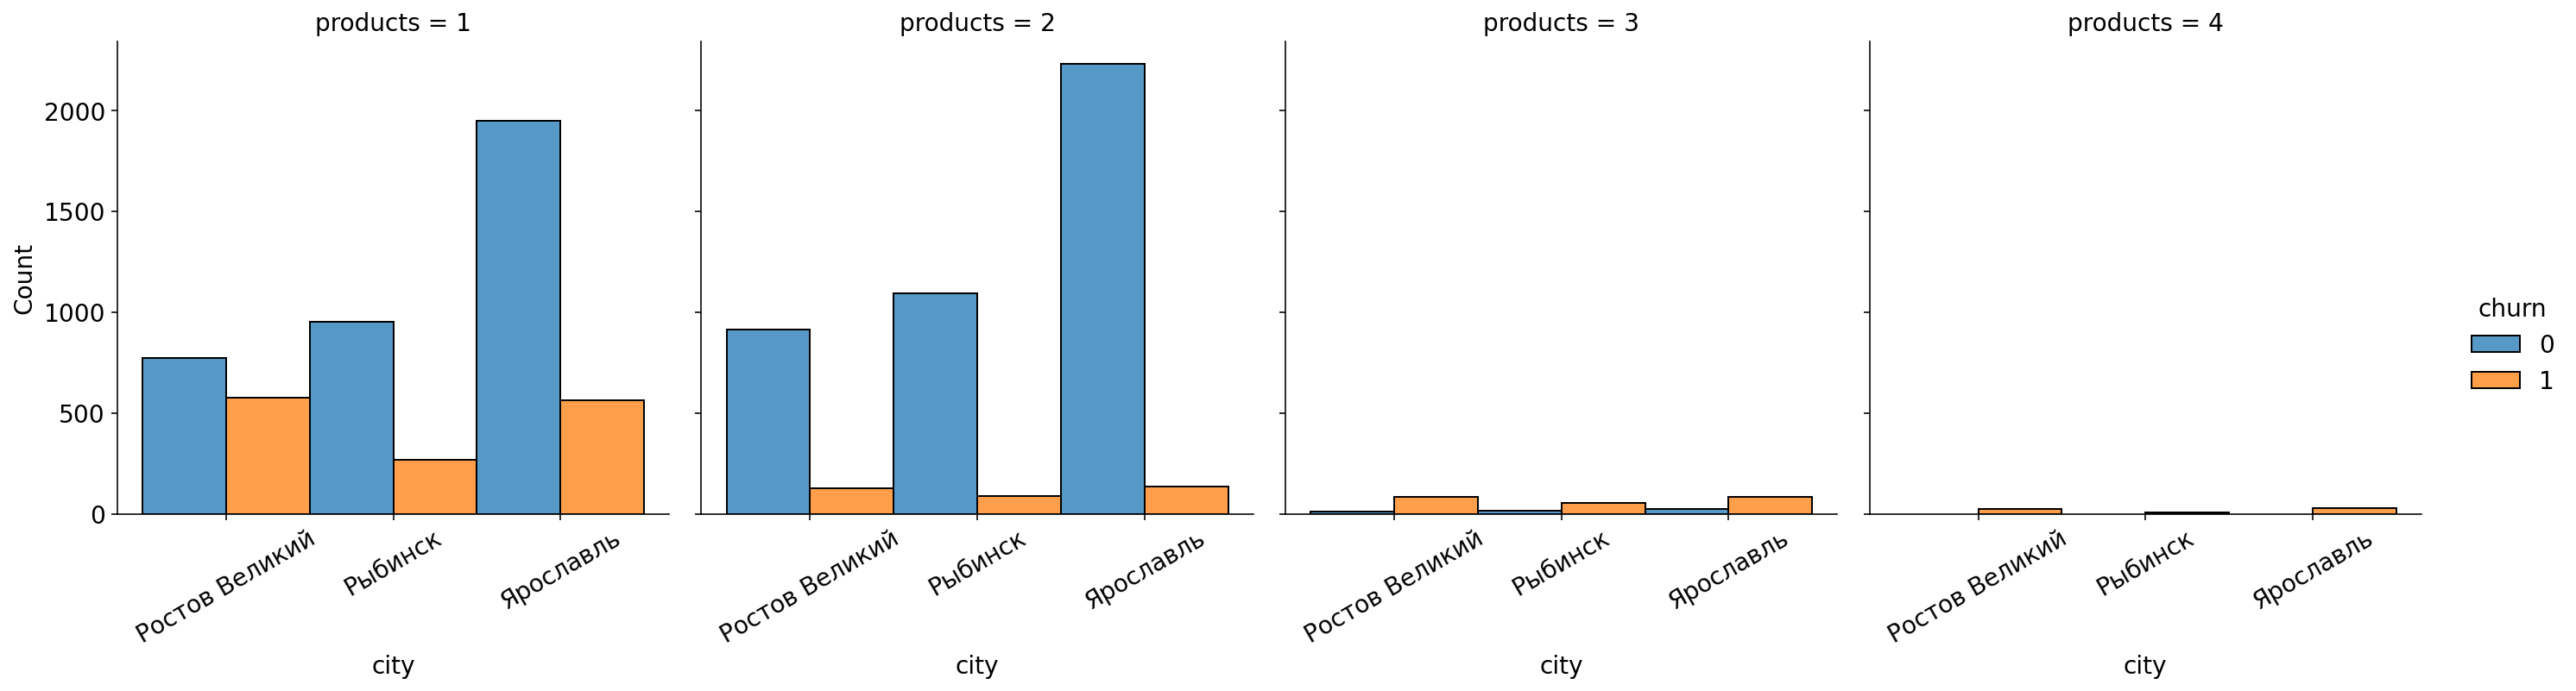

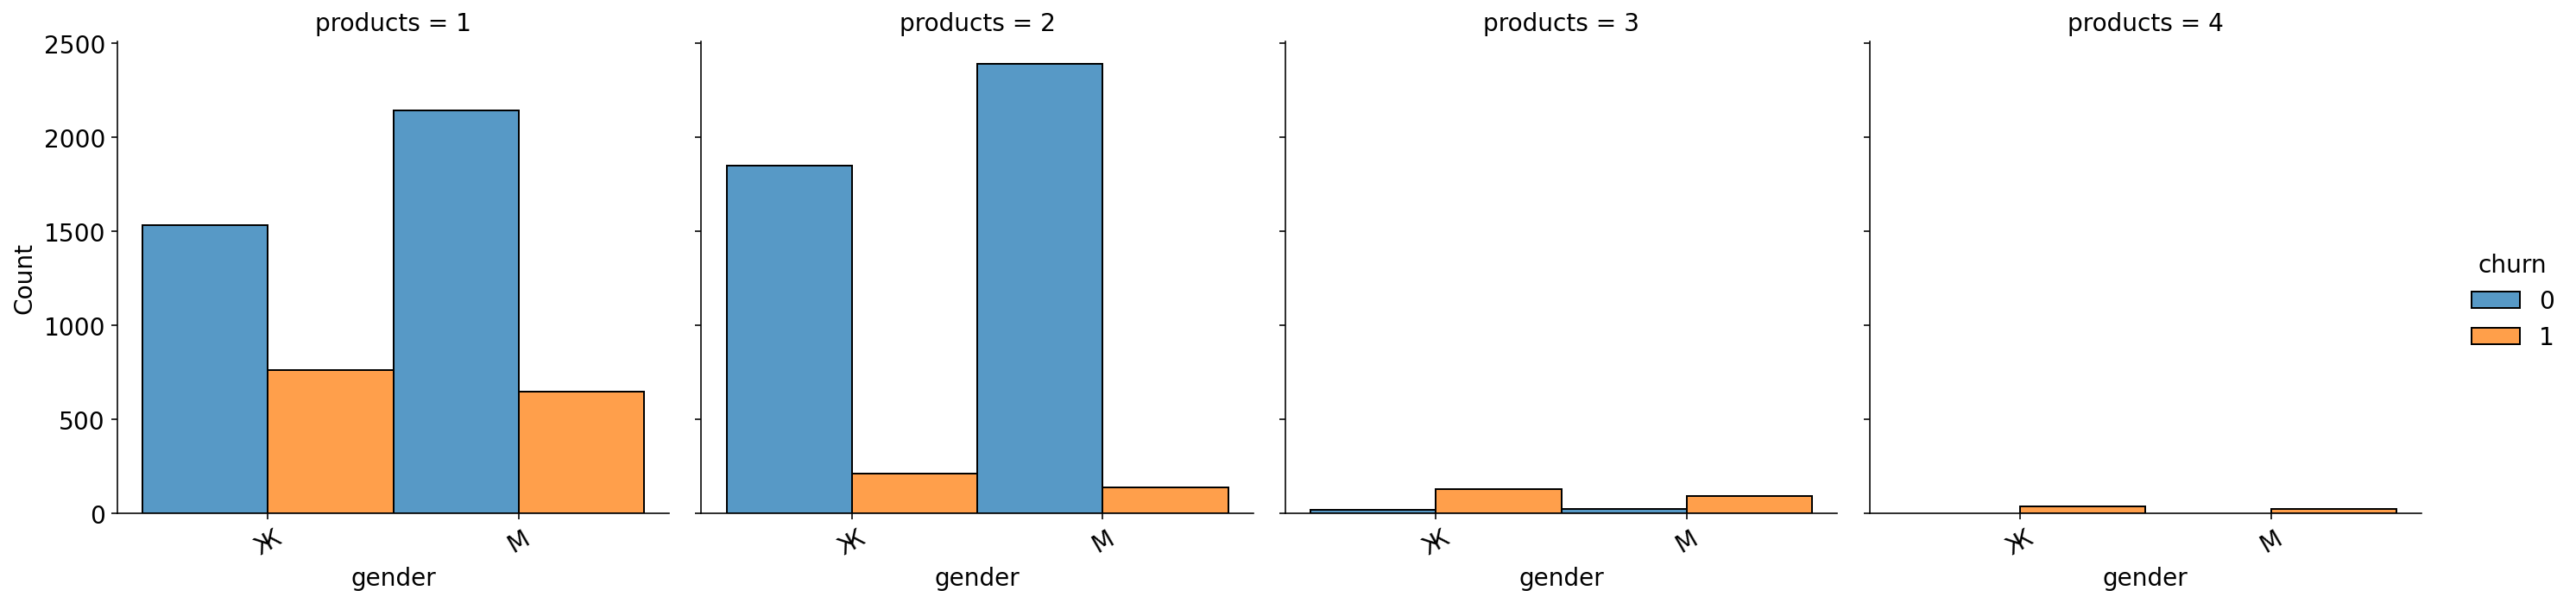

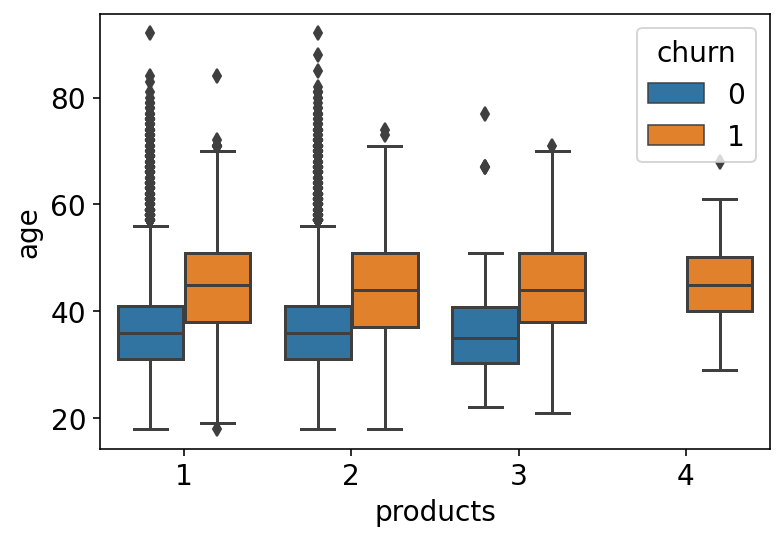

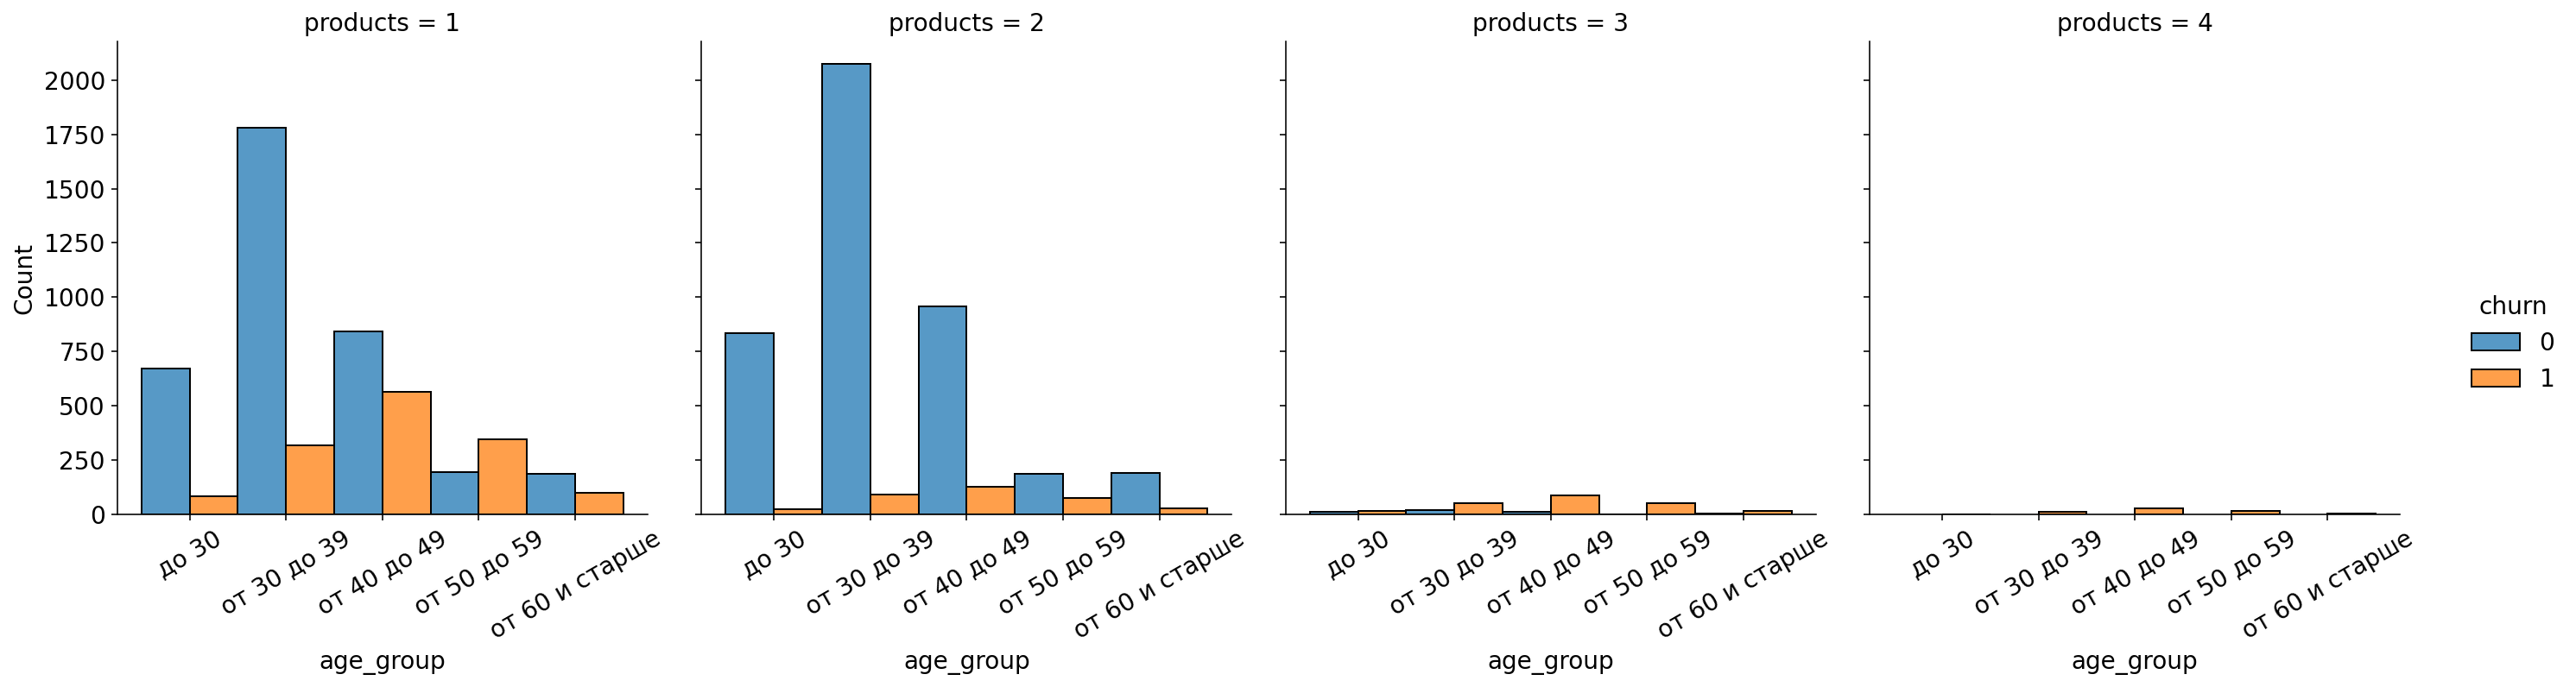

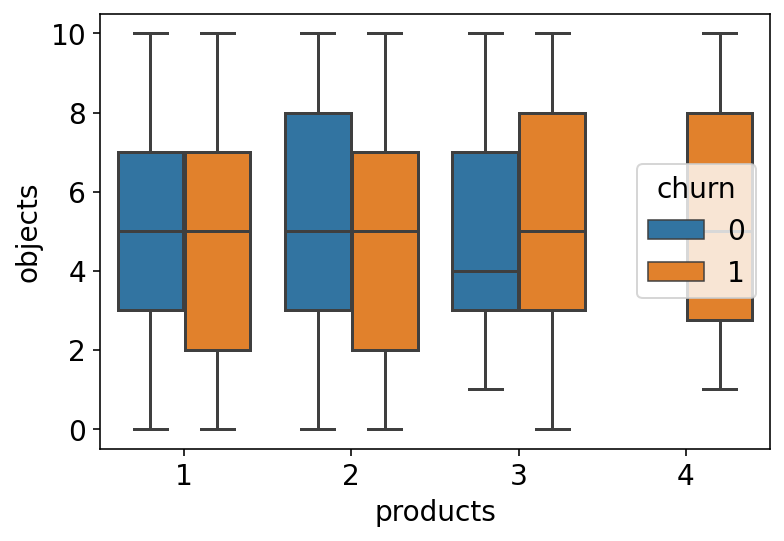

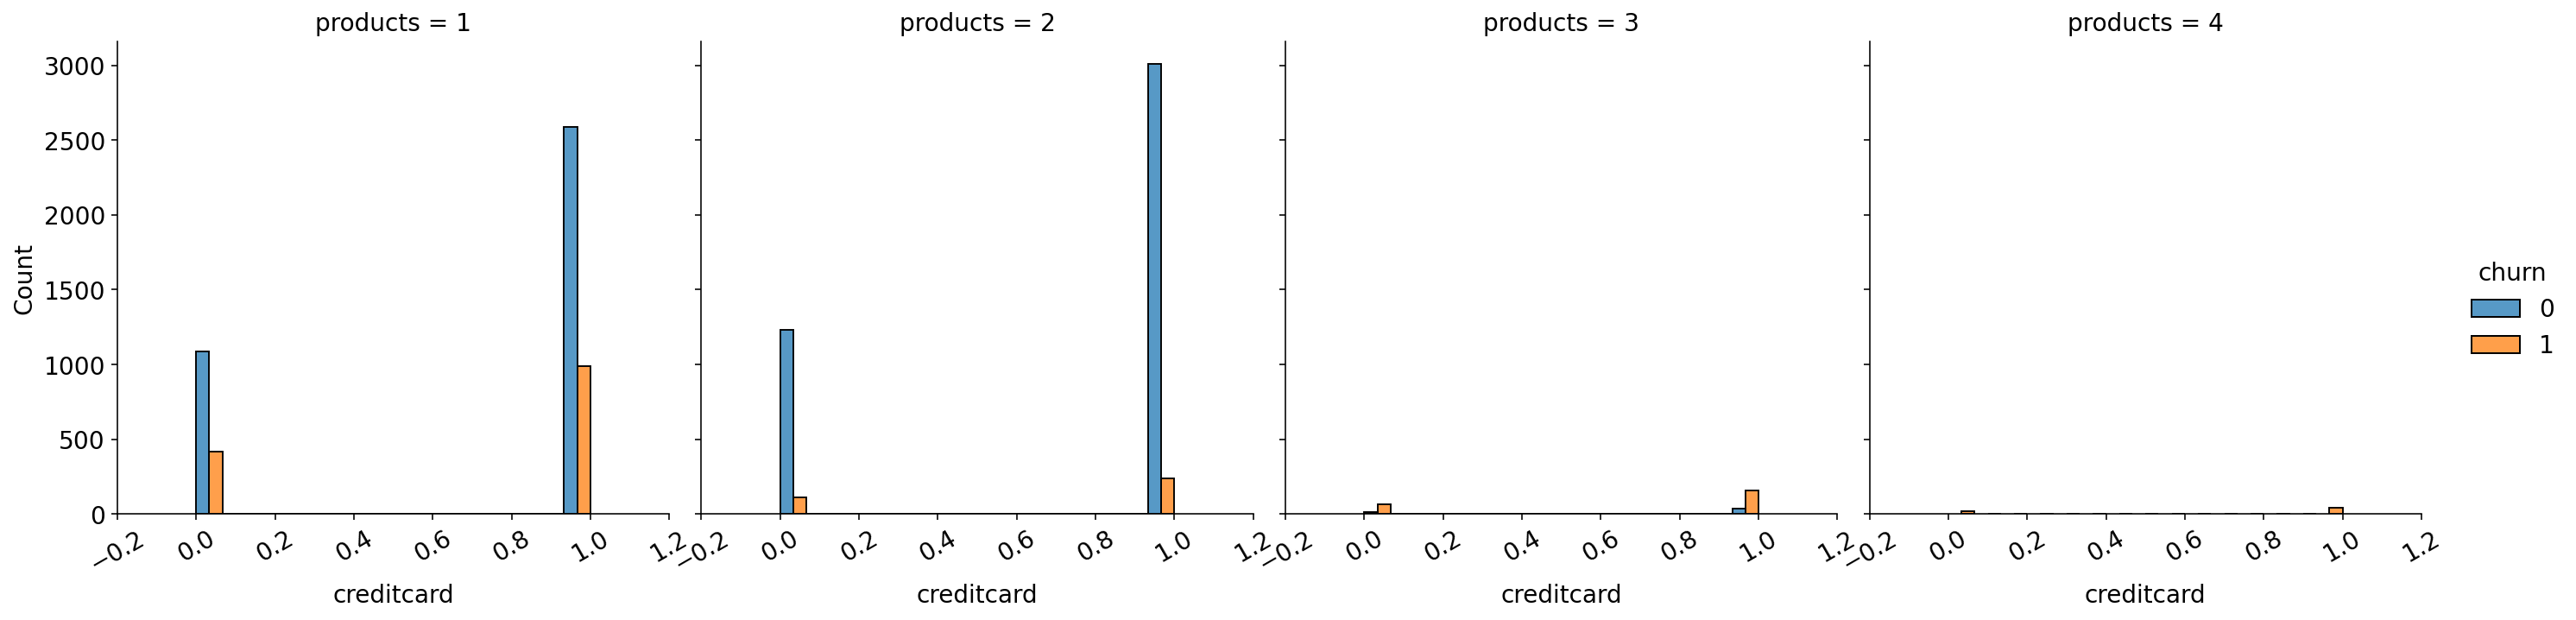

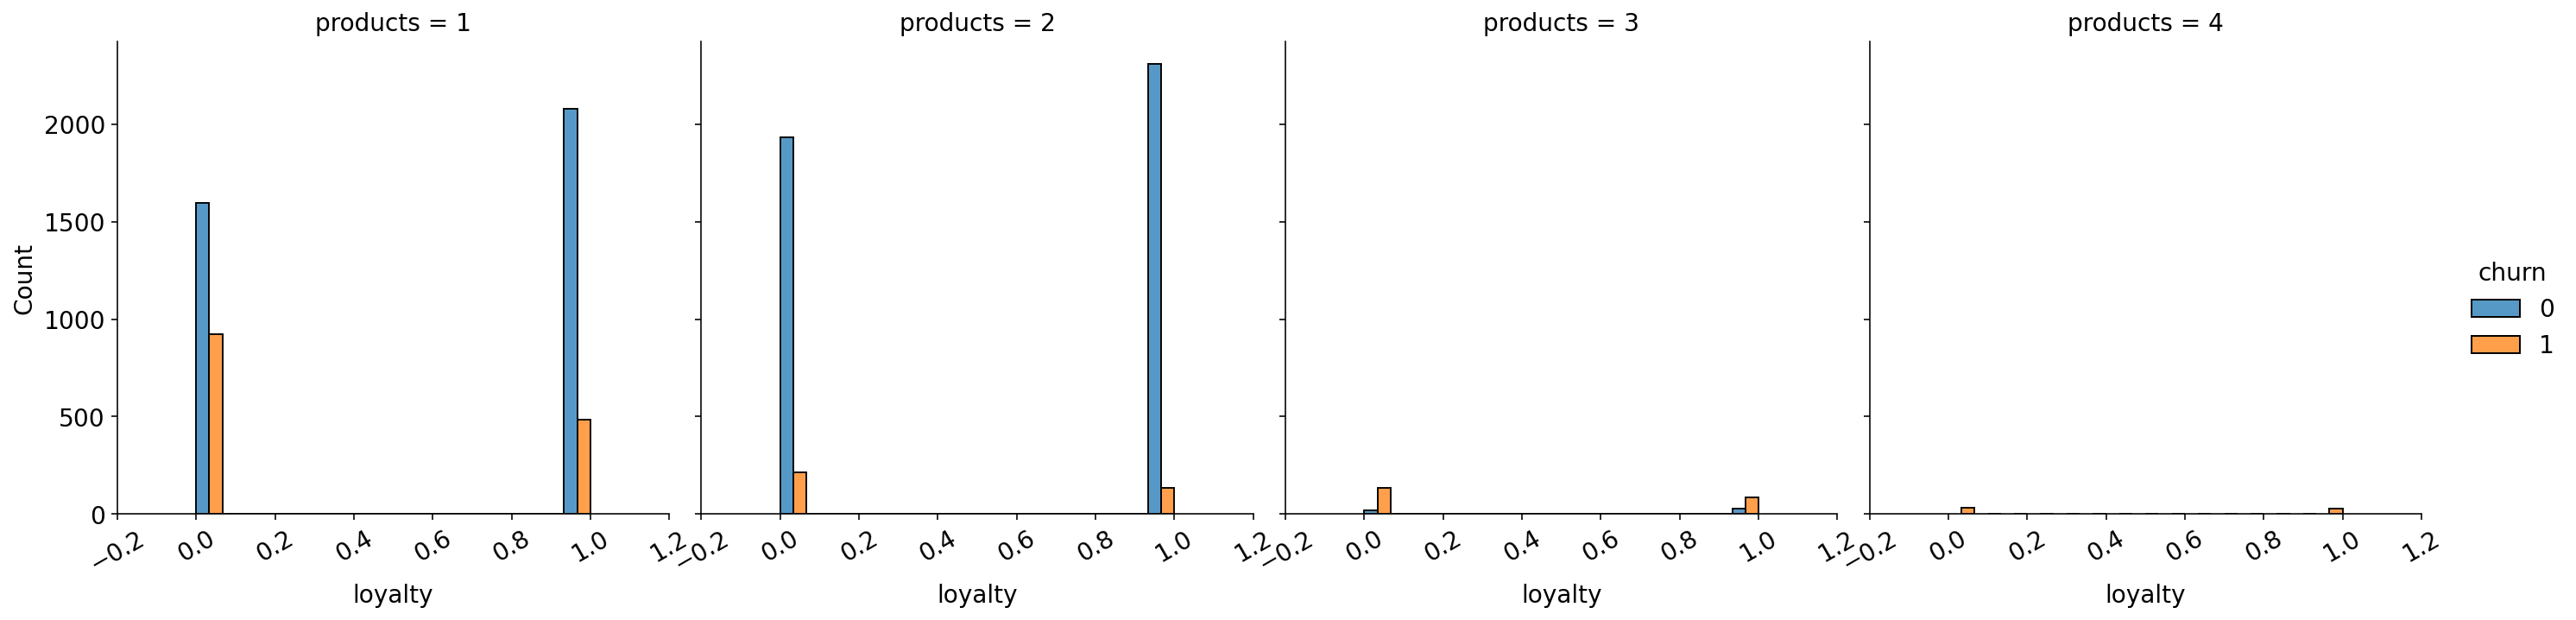

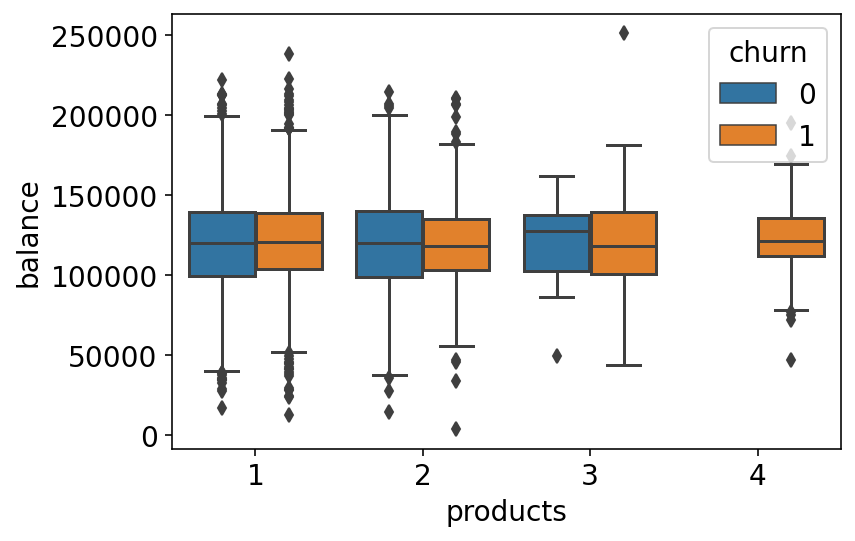

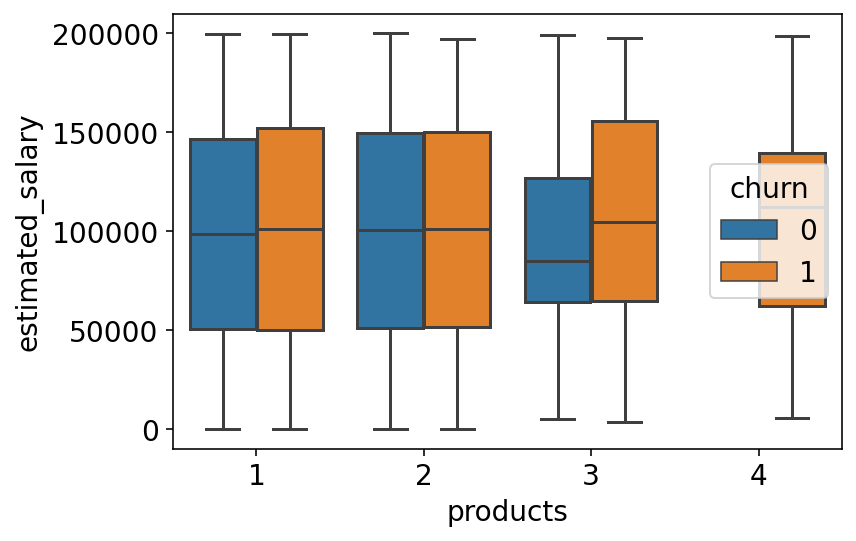

In [17]:
for col in ['score','score_group',
            'city','gender',
            'age','age_group',
            'objects','creditcard','loyalty',
            'balance', 'estimated_salary']:
    
    if df[col].nunique()>10:
        sns.boxplot(data=df, y=col, x='products', hue='churn')
        plt.show()
    else:
        sns.displot(df.sort_values(by=col), 
                    x=col, hue='churn', 
                    col='products', multiple="dodge", shrink=1).set_xticklabels(rotation=30)
        plt.show()

### Вывод по разделу
  
Клиенты с **1 продуктом**:   

* *уходят* те, у которых: низкий и средний рейтинг, проживают в Ростове, в основном женщины, в возрасте более 38, в среднем с меньшим количеством объектов в собственности (от 2 до 7), нелояльные.  
* *остаются* те, у которых: высокий рейтинг, проживает в Ярославле или Рыбинске, в основном мужчины, возраст менее 40, в среднем с большим количеством объектов (от 3 до 7), лояльные.  
  
Клиенты с **2 продуктами**:   

* *уходят* те, у которых: рейтинг низкий, проживают в Ростове, в основном женщины, в возрасте более 38, в среднем с меньшим количеством объектов в собственности (от 2 до 7), нелояльные.  
* остаются те, у которых: высокий и средний рейтинг, проживает в Ярославле или Рыбинске, в основном мужчины, возраст менее 40, в среднем с большим количеством объектов (от 3 до 8), лояльные.  
  
Клиенты с **3 продуктами**:   

* *уходят* те, у которых: низкий рейтинг, проживают в Ростове, в основном женщины, в возрасте более 39, в среднем с большим количеством объектов в собственности (от 3 до 8), без кредитной карточки, нелояльные, с ЗП от 60 000 до 150 000.  
* *остаются* те, у которых: средний и высокий рейтинг, проживает в Ярославле или Рыбинске, в основном мужчины, возраст менее 40, в среднем с большим количеством объектов (от 3 до 7), с кредитной карточкой, лояльные, с балансом на счёте выше среднего, с ЗП от 60 000 до 125 000.  
  
Клиенты с **4 продуктами**:   

* *уходят все!* у них: в основном средний рейтинг, проживают в Ростове и Ярославле, в основном женщины, в возрасте от 40 до 50 лет, в среднем с большим количеством объектов в собственности (от 3 до 8), со средними значениями лояльности, средств на балансе и ЗП.  

## Проверка статистической гипотезы

### Гипотеза 1
Проверим двустороннюю гипотезу о равенстве среднего дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

$\begin{equation*}
 \begin{cases}
   H_0 :\text{средний доход клиентов с 1 и 2 продуктами одинаковый}\\
   H_1 :\text{средний доход клиентов с 1 и 2 продуктами различается}
 \end{cases}
\end{equation*}$

Посмотрим на значения средних для исследуемых групп:

In [18]:
print('Средний доход для клиентов с 1 продуктом:',df.query('products == 1')['estimated_salary'].mean(), '\n'
        'Средний доход для клиентов с 2 продуктами:',df.query('products == 2')['estimated_salary'].mean())

Средний доход для клиентов с 1 продуктом: 99487.25685090481 
Средний доход для клиентов с 2 продуктами: 100452.01282135077


Теперь, посмотрим статистически значимо ли их различие.

Сначала глянем на выбросы в значении выручки:

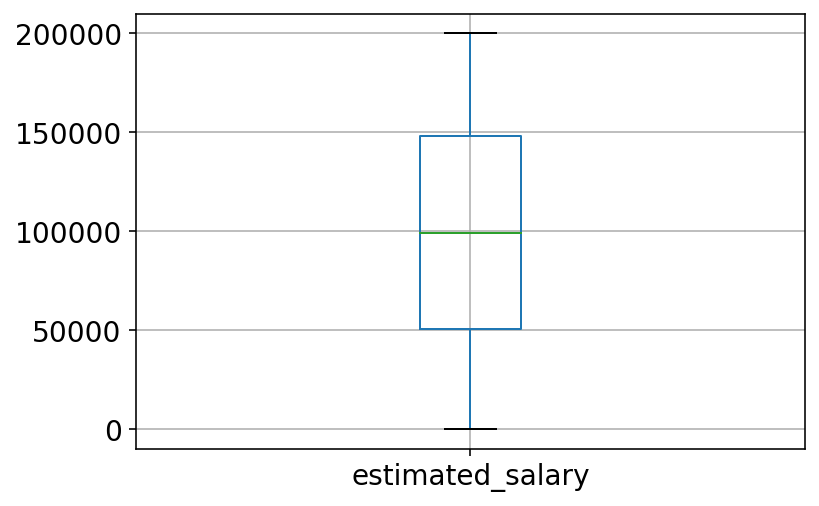

In [19]:
df.query('products == 1').boxplot('estimated_salary');

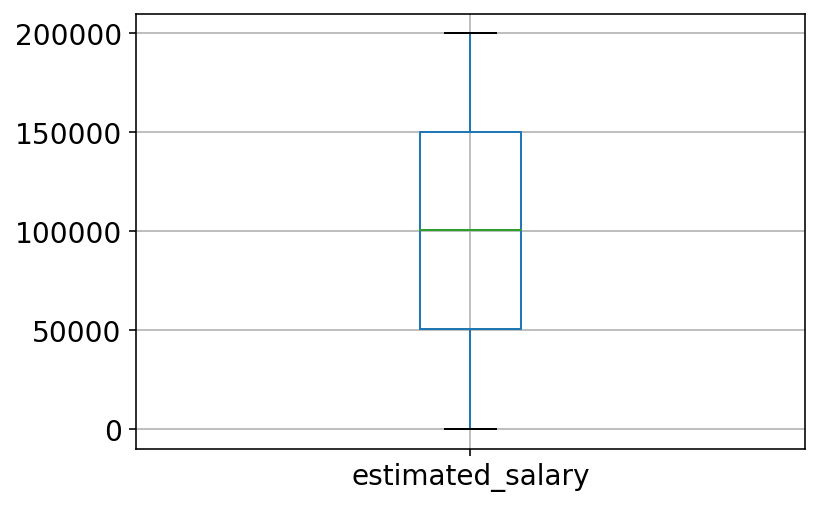

In [20]:
df.query('products == 2').boxplot('estimated_salary');

Выбросов нет, значит, можно сразу приступать к тесту Стьюдента.  
  
Чтобы проверить гипотезы о различии средних по доходу клиентов с 1 или 2 продуктами необходимо:  
1) установить, есть ли зависимость между двумя генеральными совокупностями;  
2) посмотреть распределение выборочных средних для двух совокупностей;  
3) доказать/опровергнуть равенство дисперсий двух генеральных совокупностей

Пороговое значение альфа зададим равное 0,01    
  
Итак, (1) в нашем случае мы рассматриваем генеральные совокупности клиентов с 1 или 2 банковскими продуктами, они друг с другом не связаны, т.к. представлены людьми с разным количеством потребляемых услуг. (2) В нашей выборке 10 000 человек, поэтому, ссылаясь на ЦПТ, можно утверждать, что распределение выборочных средних для двух совокупностей будет нормальным. (3) Дисперсии двух генеральных совокупностей скорее всего не равны, т.к. рассматриваемые количество продуктов предполагает разные потребности клиентов.  
  
Следовательно, для проверки гипотезы о различии средних применим ttest_ind из библиотеки scipy.stats, параметр equal_var зададим False.  
Найдём p-value. Если p-value будет меньше выбранного уровня значимости  𝛼=0.01 , то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [21]:
alpha = 0.01
results = st.ttest_ind(df.query('products == 1')['estimated_salary'], 
                       df.query('products == 2')['estimated_salary'],
                       equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


### Гипотеза 2

Проверим двустороннюю гипотезу о равенстве долей оттока между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.  
  
$\begin{equation*}
 \begin{cases}
   H_0 :\text{доля оттока клиентов с 1 и 2 продуктами одинаковая}\\
   H_1 :\text{доля оттока клиентов с 1 и 2 продуктами различается}
 \end{cases}
\end{equation*}$

In [53]:
df.groupby('products')['churn'].sum()[0:2]

products
1    1409
2     348
Name: churn, dtype: int64

In [57]:
alpha = .05 # критический уровень статистической значимости

churn = np.array(df.groupby('products')['churn'].sum()[0:2])
total_clients = np.array(df.groupby('products')['products'].count()[0:2])

# Отток клиентов в группе с 1 продуктом:
p1 = churn[0]/total_clients[0]

# Отток клиентов в группе с 2 продуктами:
p2 = churn[1]/total_clients[1]

# отток в комбинированном датасете:
p_combined = (churn[0] + churn[1]) / (total_clients[0] + total_clients[1])

# разница пропорций в датасетах
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_clients[0] + 1/total_clients[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями оттока есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли оттока разными')

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями оттока есть значимая разница


### Вывод по разделу
    Мы не смогли отвергнуть первую нулевую гипотезу о равенстве среднего дохода клиентов с 1 и 2 продуктами. Значит, считаем, что различия в средним значении дохода этих двух групп клиентов статистически не значимы. 
      
    Статистическая проверка второй нулевой гипотезы о равенстве долей оттока клиентов с 1 и 2 прродуктами, показала, что между долями оттока есть значимая разница. 

## Вывод по шагу
Похоже, что целевой сегмент для банка - это клиенты с двумя продуктами. Видимо, большее колчество продуктов не приносит пользы клиентам, а только увеличивает издержки по их управлению. Поэтому нет смысла предлагать увеличивать количество продуктов тем, у кого их уже 2. Другое дело клиенты с 1 продуктом. У них отток достаточно высокий - около одной трети. В этом случае основной причиной видится неудовлетворённость обслуживанием банка, которая могла возникнуть из-за более выгодного предложения от другого банка.  
Ключевые признаки, по которым можно сделать рекомендации по снижению оттока клиентов, на наш взгляд, следующие:  
1) возраст / возрастная группа - ключевой показатель, наблюдаются больше всего различий в значениях для уходящих и остающихся, уходят клиенты старшего возраста  
2) пол - почему-то во всех группах уходят больше женщины, чем мужчины  
3) город проживания - из Ростова уходит больше, чем из других городов.

# Шаг 3. Выводы и рекомендации

Рекомендации по снижению оттока клиентов исходя из количества приобретённых ими продуктов:  
 
    1) Для женщин выпустить карту лояльности "Леди":  
        - Мани-бэк у партнеров   
        - Фиксированный мани-бэк за операции «красота и уход»   
        - Стильный дизайн карточки (Вертикальная карточка Visa Gold, с эффектом голограммы)  
    2) Для лиц старшего возраста предоставить специальную повышенную / сниженную процентную ставку по вкладу / кредиту 
    3) Для Ростовчан специальные ставки по кредитам на недвижимость  
Стратегии развития продуктов:  
**1 банковский продукт**:   
    предложить дополнительную подходящую программ лояльности  
**2 банковских продукта**:  
    те же предложения, но взамен уже существующих продуктов: например, у клиентки уже есть 2 продукта: вклад и карточка с текущим счётом, следовательно, можно предложить перевыпустить её карточку на новых условиях лояльности  
**3 - 4 банковских продукта**:  
    необходима оптимизация! кредиты обединить под одинаковый процент и счёт, лишние карточки, вклады и текущие счета, по которым нет или мало операций, предложить закрыть и выпустить 1 новую с подходящей программой лояльности 